<a href="https://colab.research.google.com/github/CristianRiquelmeF/Ciencia-de-datos/blob/main/Trabajo2/Copia_de_Cristian_Riquelme_SENDA_General_2020_(6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Proyecto de Diploma Data Sciences**

**Universidad de Santiago de Chile**

---


“Caracterización del consumo de alcohol y drogas en Chile”

Alumno: Cristian Riquelme Fernández


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import recall_score , classification_report , confusion_matrix  ,roc_curve , roc_auc_score , accuracy_score
from sklearn.metrics import precision_recall_curve , auc ,f1_score , plot_confusion_matrix , precision_score , recall_score

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek


from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Carga base de datos**

In [ ]:
data = pd.read_stata('/content/drive/MyDrive/BBDD/Base publico general enpg 2020 (stata 13).dta')
data.head()

,SbjNum,REGION,Nom_comuna,S01,S02,ST_1,ST_2,ST_3,ST_4,ST_5,...,DP_11,DP_12,DP_13,DP_14,DP_15,DP_16,DP_17,DP_18,FACT_PERS_COMUNA,seccion
0,379435.0,5.0,5109.0,Mujer,36.0,4.0,1.0,3.0,12.0,3.0,...,2.0,6.0,1.0,4.0,5.0,3.0,1.0,4.0,1115.924085,4.0
1,380894.0,5.0,5109.0,Mujer,50.0,3.0,2.0,NaN,NaN,NaN,...,2.0,6.0,1.0,4.0,1.0,3.0,4.0,4.0,441.155156,1.0
2,380948.0,5.0,5109.0,Hombre,38.0,4.0,1.0,3.0,15.0,1.0,...,2.0,8.0,1.0,4.0,2.0,5.0,3.0,4.0,2661.144031,2.0
3,380975.0,5.0,5109.0,Hombre,14.0,4.0,2.0,NaN,NaN,NaN,...,1.0,7.0,2.0,1.0,5.0,4.0,2.0,2.0,2124.623057,2.0
4,381352.0,5.0,5109.0,Mujer,44.0,4.0,2.0,NaN,NaN,NaN,...,2.0,6.0,1.0,4.0,1.0,9.0,5.0,4.0,441.155156,1.0


## **Análisis preliminar** ##

In [ ]:
print("Cantidad de personas encuestadas:")
display(data.shape[0])
print("")
print("Número de campos disponbiles para cada individuo (Número de columnas):")
display(data.shape[1])

Cantidad de personas encuestadas:


16662


Número de campos disponbiles para cada individuo (Número de columnas):


395

In [ ]:
#Visualización de todas las columnas
with pd.option_context('display.max_columns', None):
  display(data.head(2))

,SbjNum,REGION,Nom_comuna,S01,S02,ST_1,ST_2,ST_3,ST_4,ST_5,ST_6,ST_7,CE_1,CE_2,CE_3,CE_4,CE_5,CE_6,CE_7,OH_1,OH_2,OH_3,OH_4,OH_5,OH_6,OH_7,OH_8,OH_9,OH_10,OH_11,OH_12,OH_13,OH_14,OH_15,OH_16,OH_17,OH_18_O1,OH_19_O1,OH_18_O2,OH_19_O2,OH_18_O3,OH_19_O3,OH_18_O4,OH_19_O4,OH_18_O5,OH_19_O5,OH_18_O6,OH_19_O6,OH_20,OH_21,OH_22,OH_23,MAR_1,MAR_2,MAR_3,MAR_4,MAR_5,MAR_6,MAR_7,MAR_8,MAR_9,MAR_10,MAR_11,MAR_12,MAR_13,MAR_14,MAR_15,MAR_16,MAR_17,MAR_18,MAR_19,MAR_20,MAR_21,MAR_22,MAR_23_O1,MAR_23_O2,MAR_23_O3,MAR_23_O4,MAR_23_O5,MAR_23_O6,MAR_23_O7,MAR_23_O8,MAR_23_O9,MAR_23_O10,MARVIA_10_ESP,PB_1,PB_2,PB_3,PB_4,PB_5,PB_6,PB_7,PB_8,PB_9,PB_10,PB_11,PB_12,PB_13,PB_14,PB_15,PB_16,PB_17,PB_18,PB_19,COC_1,COC_2,COC_3,COC_4,COC_5,COC_6,COC_7,COC_8,COC_9,COC_10,COC_11,COC_12,COC_13,COC_14,COC_15,COC_16,COC_17,COC_18,COC_19,TRANS_1_O1,TRANS_1_O2,TRANS_1_O3,TRANS_1_O4,TRANS_1_O5,TRANS_1_O6,TRANS_1_O7,TRANS_1_O8,TRANS_1_O9,T_TRANS_2_1,T_TRANS_2_2,T_TRANS_2_3,T_TRANS_2_4,T_TRANS_2_5,T_TRANS_2_6,T_TRANS_2_7,T_TRANS_2_8,T_TRANS_2_9,TRANS_3,TRANS_4,Q_248_S,ANALG_1_O1,ANALG_1_O2,ANALG_1_O3,ANALG_1_O4,ANALG_1_O5,ANALG_1_O6,ANALG_1_O7,ANALG_1_O8,T_ANALG_2_1,T_ANALG_2_2,T_ANALG_2_3,T_ANALG_2_4,T_ANALG_2_5,T_ANALG_2_6,T_ANALG_2_7,T_ANALG_2_8,ANALG_3,ANALG_4,Q_253_S,OD_1_O1,OD_1_O2,OD_1_O3,OD_1_O4,OD_1_O5,OD_1_O6,OD_1_O7,OD_3_O1,OD_3_O2,OD_3_O3,OD_3_O4,OD_3_O5,OD_3_O6,OD_3_O7,OD_5_O1,OD_5_O2,OD_7_O1,OD_7_O2,OD_7_O3,OD_7_O4,OD_7_O5,OD_7_O6,OD_7_O7,OD_7_O8,OD_7_O9,OD_7_O10,OD_9_O1,OD_9_O2,OD_9_O3,OD_9_O4,OD_9_O5,OD_9_O6,OD_9_O7,OD_9_O8,OD_9_O9,OD_9_O10,OD_11_O1,OD_11_O2,OD_11_O3,OD_11_O4,OD_11_O5,OD_13_O1,OD_13_O2,OD_13_O3,OD_13_O4,OD_13_O5,OD_13_O6,OD_13_O7,OD_13_O8,OD_13_O9,OD_13_O10,OD_13_O11,OD_15,T_OD_2_1,T_OD_2_2,T_OD_2_3,T_OD_2_4,T_OD_2_5,T_OD_2_6,T_OD_2_7,T_OD_4_1,T_OD_4_2,T_OD_4_3,T_OD_4_4,T_OD_4_5,T_OD_4_6,T_OD_4_7,T_OD_6_1,T_OD_6_2,T_OD_8_1,T_OD_8_2,T_OD_8_3,T_OD_8_4,T_OD_8_5,T_OD_8_6,T_OD_8_7,T_OD_8_8,T_OD_8_9,T_OD_8_10,T_OD_10_1,T_OD_10_2,T_OD_10_3,T_OD_10_4,T_OD_10_5,T_OD_10_6,T_OD_10_7,T_OD_10_8,T_OD_10_9,T_OD_10_10,T_OD_12_1,T_OD_12_2,T_OD_12_3,T_OD_12_4,T_OD_12_5,T_OD_14_1,T_OD_14_2,T_OD_14_3,T_OD_14_4,T_OD_14_5,T_OD_14_6,T_OD_14_7,T_OD_14_8,T_OD_14_9,T_OD_14_10,T_OD_14_11,CC_1,CC_2,CC_3,CC_4,Q_279_S,VIO_1,T_VIO_2_1,T_VIO_2_2,T_VIO_2_3,T_VIO_2_4,T_VIO_2_5,T_VIO_2_6,T_VIO_2_7,T_VIO_2_8,T_VIO_2_9,T_VIO_2_10,VIO_3,T_SG_1_B,T_SG_1_C,T_SG_1_D,T_SG_1_G,T_SG_1_H,T_SG_1_E,T_SG_1_F,T_SG_1_I,T_SG_1_J,T_SG_1_K,T_SG_1_A,T_SG_1_L,COVID_1_O1,COVID_1_O2,COVID_1_O3,COVID_1_O4,COVID_1_O5,COVID_1_O6,COVID_1_O7,COVID_1_O8,COVID_1_O9,ESPT_COVID_1_O8,COVID_2_O1,COVID_2_O2,COVID_2_O3,COVID_2_O4,COVID_2_O5,COVID_2_O6,COVID_2_O7,COVID_2_O8,TRATA_1,TRATA_2,TRATA_3,TRATA_4,TRATA_5,T_PR_1_1,T_PR_1_2,T_PR_1_3,T_PR_1_4,T_PR_1_5,T_PR_1_6,T_PR_1_7,T_PR_1_8,T_PR_1_9,T_PR_1_10,T_PR_1_11,EB_1,T_EB_2_1,T_EB_2_2,T_EB_2_3,T_EB_3_1,T_EB_3_2,T_EB_3_3,T_EB_3_4,T_EB_3_5,T_EB_3_6,T_EB_3_7,T_EB_3_8,T_EB_4_1,T_EB_4_2,T_EB_4_3,T_EB_4_4,T_EB_5_1,T_EB_5_2,T_EB_5_3,T_EB_5_4,T_EB_6_1,T_EB_6_2,T_EB_6_3,T_EB_6_4,T_OP_1_1,T_OP_1_2,T_OP_1_3,T_OP_1_4,T_OP_1_5,T_OP_1_6,T_OP_2_1,T_OP_2_2,T_OP_2_3,T_OP_2_4,T_OP_2_5,CO_1,CO_2,CO_3,CO_4,CO_5,CO_6,DP_1,DP_2,DP_3,DP_4,DP_5,DP_6,Q_319_S,DP_7,Q_321_S,DP_8,Q_322_S,DP_9,DP_10,DP_11,DP_12,DP_13,DP_14,DP_15,DP_16,DP_17,DP_18,FACT_PERS_COMUNA,seccion
0,379435.0,5.0,5109.0,Mujer,36.0,4.0,1.0,3.0,12.0,3.0,NaN,NaN,1.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,15.0,1.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
data['DP_1'].describe()

count    16662.000000
mean         5.995619
std         16.781358
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         99.000000
Name: DP_1, dtype: float64

**Selección de variables para análisis**

In [ ]:
#Nueva base de datos
df = data[['SbjNum','S01','REGION','S02','DP_2','DP_5','DP_16','DP_12','CO_1','CO_6','DP_18','OH_1','OH_4','ST_1','MAR_1','MAR_4','COC_1','COC_4','DP_9']]

In [ ]:
#Tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16662 entries, 0 to 16661
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   SbjNum  16662 non-null  float64 
 1   S01     16662 non-null  category
 2   REGION  16662 non-null  float64 
 3   S02     16662 non-null  float64 
 4   DP_2    16662 non-null  category
 5   DP_5    16662 non-null  category
 6   DP_16   16662 non-null  float64 
 7   DP_12   16662 non-null  float64 
 8   CO_1    16662 non-null  float64 
 9   CO_6    11402 non-null  float64 
 10  DP_18   16662 non-null  float64 
 11  OH_1    16662 non-null  float64 
 12  OH_4    12639 non-null  float64 
 13  ST_1    16662 non-null  float64 
 14  MAR_1   16662 non-null  float64 
 15  MAR_4   5033 non-null   float64 
 16  COC_1   16662 non-null  float64 
 17  COC_4   770 non-null    float64 
 18  DP_9    16662 non-null  float64 
dtypes: category(3), float64(16)
memory usage: 2.2 MB


In [ ]:
#Categorías por variables
df.nunique().sort_values()

S01           2
CO_1          2
COC_1         4
DP_5          4
MAR_1         4
OH_1          4
MAR_4         5
DP_2          5
COC_4         5
DP_18         5
OH_4          5
ST_1          8
CO_6          9
DP_16         9
DP_9         11
DP_12        14
REGION       16
S02          54
SbjNum    16662
dtype: int64

In [ ]:
#Revisión de valores nulos.
print(df.isnull().sum().sort_values(ascending = False))
na_por = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print('##################################')
print('Valores porcentuales de nulos')
print(na_por)

COC_4     15892
MAR_4     11629
CO_6       5260
OH_4       4023
DP_18         0
COC_1         0
MAR_1         0
ST_1          0
OH_1          0
SbjNum        0
S01           0
CO_1          0
DP_12         0
DP_16         0
DP_5          0
DP_2          0
S02           0
REGION        0
DP_9          0
dtype: int64
##################################
Valores porcentuales de nulos
COC_4     95.378706
MAR_4     69.793542
CO_6      31.568839
OH_4      24.144761
DP_18      0.000000
COC_1      0.000000
MAR_1      0.000000
ST_1       0.000000
OH_1       0.000000
SbjNum     0.000000
S01        0.000000
CO_1       0.000000
DP_12      0.000000
DP_16      0.000000
DP_5       0.000000
DP_2       0.000000
S02        0.000000
REGION     0.000000
DP_9       0.000000
dtype: float64


## **Analisis univariado** ##

In [ ]:
#Conteo por variable Sexo
df["S01"].value_counts()

Mujer     9784
Hombre    6878
Name: S01, dtype: int64

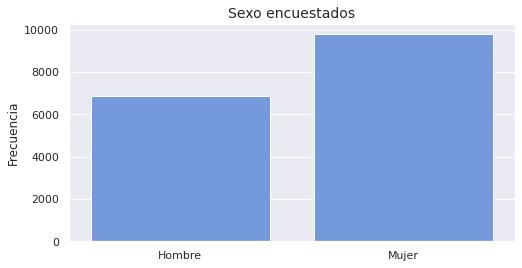

In [ ]:
#Gráfica por variable Sexo
plt.figure(figsize=(8,4))
sns.set_theme(style="darkgrid")
sns.countplot(x="S01", data=df, color='cornflowerblue')
plt.title('Sexo encuestados',fontsize=14)
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.show()

+ **Región y macrozonas**

In [ ]:
#Cambio de tipo de tipo de dato, float a int.
df["REGION"].value_counts()

13.0    2628
5.0     1508
8.0     1264
9.0     1237
7.0     1133
1.0      969
16.0     969
6.0      966
10.0     932
3.0      846
14.0     835
12.0     742
15.0     698
2.0      689
11.0     660
4.0      586
Name: REGION, dtype: int64

In [ ]:
#Codificando en nueva columna número de región a nombre
df['REGIONNOM'] = df['REGION'].map( {     1: 'I Región de Tarapacá',
                                          2: 'II Región de Antofagasta',
                                          3: 'III Región de Atacama',
                                          4: 'IV Región de Coquimbo',
                                          5: 'V Región de Valparaíso',
                                          6: 'VI Región del Libertador General Bernardo O’Higgins',
                                          7: 'VII Región del Maule',
                                          8: 'VIII Región del Biobío',
                                          9: 'IX Región de La Araucanía',
                                         10: 'X Región de Los Lagos',
                                         11: 'XI Región Aysén del General Carlos Ibáñez del Campo',
                                         12: 'XII Región de Magallanes y Antártica Chilena',
                                         13: 'Región Metropolitana de Santiago',
                                     14:'XIV Región de Los Ríos',
                                     15:'XV Región de Arica y Parinacota',
                                     16: 'XVI Región de Ñuble'}
                                       ).astype(object)

<ipython-input-14-89d879e57d32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['REGIONNOM'] = df['REGION'].map( {     1: 'I Región de Tarapacá',


In [ ]:
df["REGIONNOM"].value_counts()

Región Metropolitana de Santiago                       2628
V Región de Valparaíso                                 1508
VIII Región del Biobío                                 1264
IX Región de La Araucanía                              1237
VII Región del Maule                                   1133
I Región de Tarapacá                                    969
XVI Región de Ñuble                                     969
VI Región del Libertador General Bernardo O’Higgins     966
X Región de Los Lagos                                   932
III Región de Atacama                                   846
XIV Región de Los Ríos                                  835
XII Región de Magallanes y Antártica Chilena            742
XV Región de Arica y Parinacota                         698
II Región de Antofagasta                                689
XI Región Aysén del General Carlos Ibáñez del Campo     660
IV Región de Coquimbo                                   586
Name: REGIONNOM, dtype: int64

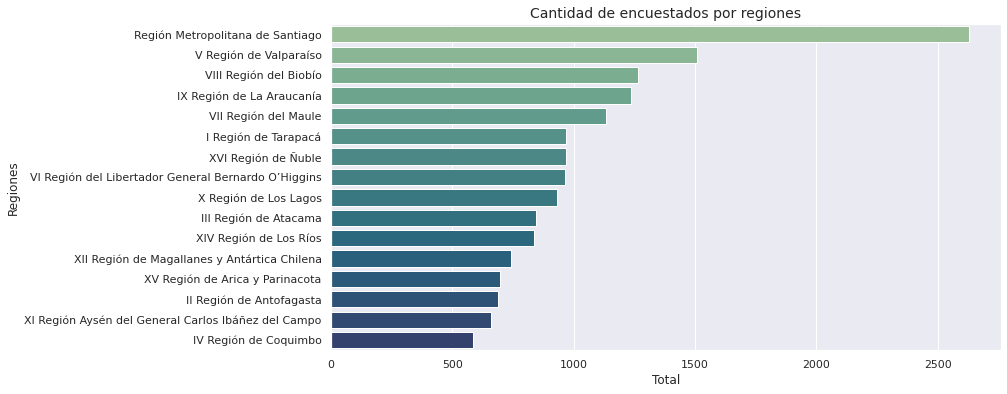

In [ ]:
#Gráfico de barra por regiones
reg = df['REGIONNOM'].value_counts().sort_values(ascending=False)
orden =reg.index
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.countplot(y='REGIONNOM', data=df, palette="crest", order=orden)
plt.ylabel('Regiones')
plt.xlabel('Total')
plt.title('Cantidad de encuestados por regiones',fontsize=14)
plt.show()

In [ ]:
#Categorización de regiones según macrozonas
df['macrozona'] = df['REGION'].map( {     1: 'Norte',
                                          2: 'Norte',
                                          3: 'Norte',
                                          4: 'Centro',
                                          5: 'Centro',
                                          6: 'Centro Sur',
                                          7: 'Centro Sur',
                                          8: 'Centro Sur',
                                          9: 'Sur',
                                         10: 'Sur',
                                         11: 'Austral',
                                         12: 'Austral',
                                         13: 'Región Metropolitana de Santiago',
                                     14:'Sur',
                                     15:'Norte',
                                     16: 'Centro Sur'}
                                       ).astype(object)

<ipython-input-17-0c0117ac3752>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['macrozona'] = df['REGION'].map( {     1: 'Norte',


In [ ]:
df["macrozona"].value_counts()

Centro Sur                          4332
Norte                               3202
Sur                                 3004
Región Metropolitana de Santiago    2628
Centro                              2094
Austral                             1402
Name: macrozona, dtype: int64

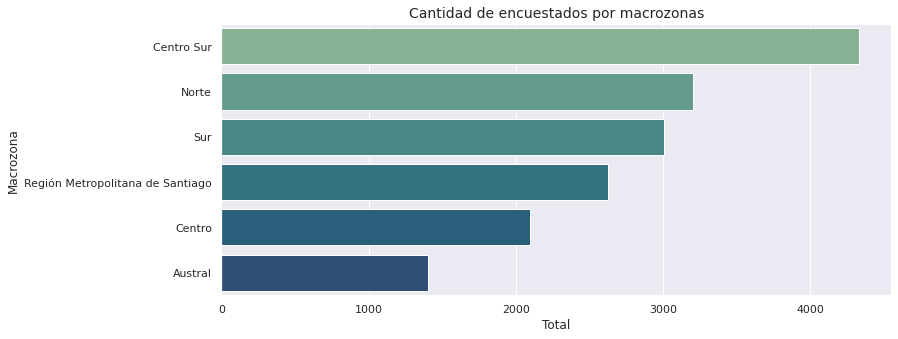

In [ ]:
#Gráfico de barra por macrozonas
reg = df['macrozona'].value_counts().sort_values(ascending=False)
orden =reg.index
plt.figure(figsize=(12,5))
sns.set_theme(style="darkgrid")
sns.countplot(y='macrozona', data=df, palette="crest", order=orden)
plt.ylabel('Macrozona')
plt.xlabel('Total')
plt.title('Cantidad de encuestados por macrozonas',fontsize=14)
plt.show()

+ **Edad**

In [ ]:
#Revisión de la variable edad
print(df['S02'].describe())

count    16662.000000
mean        41.097227
std         15.452661
min         12.000000
25%         28.000000
50%         41.000000
75%         55.000000
max         65.000000
Name: S02, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribución de edades')

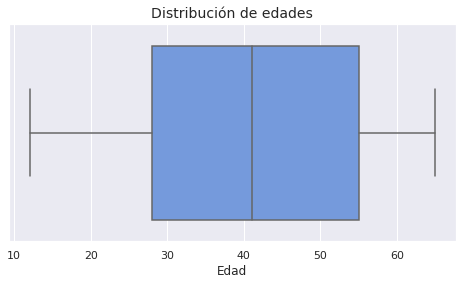

In [ ]:
#Revisión con boxplot de variable edad
fig=plt.figure(figsize=(8,4))
ax=sns.boxplot(df['S02'], color='cornflowerblue')
plt.xlabel('Edad')
ax.set_title('Distribución de edades', fontsize=14)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Edad')

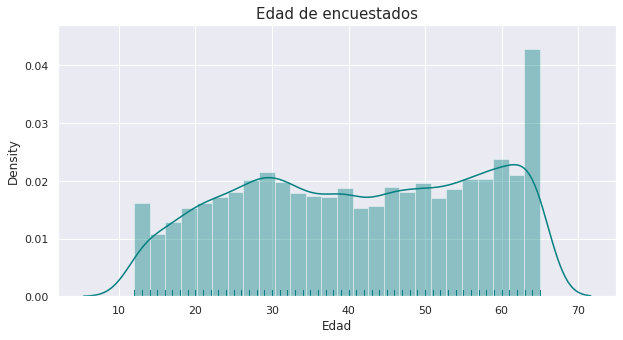

In [ ]:
#Distribución edades
plt.figure(figsize=(10,5))
x = df['S02']
plt.title('Edad de encuestados', fontsize=15)
ax = sns.distplot(x, color='teal', rug=True)
plt.xlabel('Edad')

In [ ]:
#Categorizando edades por tramos
bins_edad = [12,18,25,34,44,54,65]
labels_edad = ['12-18', '19-25', '26-34','35-44','45-54','55-65']
df['edad_cat'] = pd.cut(df['S02'], bins_edad, labels = labels_edad,include_lowest = True)

<ipython-input-23-0eec84842cbd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['edad_cat'] = pd.cut(df['S02'], bins_edad, labels = labels_edad,include_lowest = True)


In [ ]:
df["edad_cat"].value_counts()

55-65    4351
45-54    3134
26-34    3006
35-44    2867
19-25    1950
12-18    1354
Name: edad_cat, dtype: int64

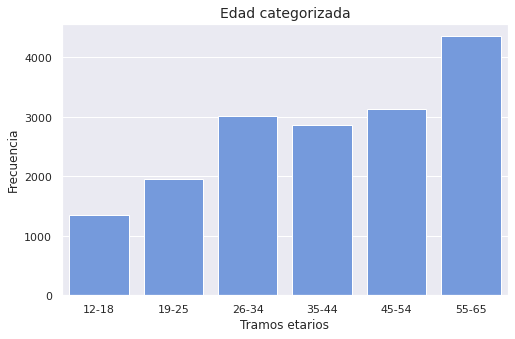

In [ ]:
#Gráfico de barras
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
sns.countplot(x="edad_cat", data=df, color='cornflowerblue')
plt.xlabel('Tramos etarios')
plt.ylabel('Frecuencia')
plt.title('Edad categorizada',fontsize=14)
plt.show()

+ **Estado de salud**

In [ ]:
#ST_1) ¿cómo calificaría Ud. su estado de salud, en general, durante los últimos 12 meses?
df["ST_1"].value_counts()

4.0     8804
3.0     4081
5.0     1551
6.0     1171
2.0      861
1.0      188
88.0       4
99.0       2
Name: ST_1, dtype: int64

In [ ]:
#Codificando valores con etiquetas correspondientes y agregando como columna nueva
df['est_salud'] = df['ST_1'].map( {
1: 'Muy malo',
2: 'Malo',
3: 'Regular',
4: 'Bueno',
5: 'Muy bueno',
6: 'Excelente',
88: 'No sabe',
99: 'No contesta'}

                                       ).astype(object)

<ipython-input-27-2861ccf36315>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est_salud'] = df['ST_1'].map( {


In [ ]:
df['est_salud'].value_counts()

Bueno          8804
Regular        4081
Muy bueno      1551
Excelente      1171
Malo            861
Muy malo        188
No sabe           4
No contesta       2
Name: est_salud, dtype: int64

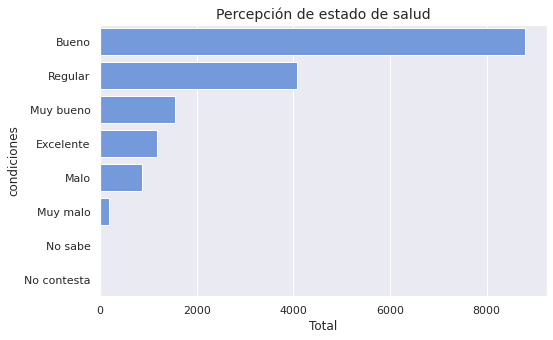

In [ ]:
#Gráfico de barra por estado de salud
reg = df['est_salud'].value_counts().sort_values(ascending=False)
orden =reg.index
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
sns.countplot(y='est_salud', data=df, color='cornflowerblue', order=orden)
plt.ylabel('condiciones')
plt.xlabel('Total')
plt.title('Percepción de estado de salud',fontsize=14)
plt.show()

+ **Estado civil**

In [ ]:
#DP_2) ¿Cuál es su estado civil actual (legal)?
df["DP_2"] = df["DP_2"].astype("category")
df["DP_2"].value_counts()

<ipython-input-30-8854c4365cd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DP_2"] = df["DP_2"].astype("category")


Soltero/a                 9305
Casado/a                  4612
Divorciado/a-Anulado/a    1412
Conviviente Civil          699
Viudo/a                    634
Name: DP_2, dtype: int64

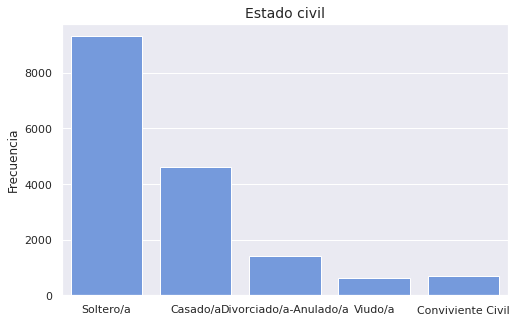

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
sns.countplot(x="DP_2", data=df, color='cornflowerblue')
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.title('Estado civil',fontsize=14)
plt.show()

+ **Ingresos del hogar por tramos**

In [ ]:
#Ingreso total del hogar por tramos
df['DP_16'].value_counts()

4.0    4527
5.0    3400
9.0    3277
3.0    2067
2.0    1387
6.0     829
7.0     433
1.0     373
8.0     369
Name: DP_16, dtype: int64

In [ ]:
#Codificando valores con etiquetas correspondientes y agregando como columna nueva
df['tram_ingr'] = df['DP_16'].map( {
1: 'Menos de $100.000',
2: 'Entre $100.001 y 200.000',
3: 'Entre $200.001 y 300.000',
4: 'Entre $300.001 y 400.000',
5: 'Entre $400.001 y 500.000',
6: 'Entre $500.001 y 750.000',
7: 'Entre $750.001 y 1.000.000',
8: 'Entre $1.000.001 y 1.500.000',
9: 'Entre $1.500.001 y 2.000.000',
10: 'Más de $2.000.000',
88: 'No sabe',
99: 'No contesta'}

                                       ).astype(object)

<ipython-input-33-ec072a3ce08b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tram_ingr'] = df['DP_16'].map( {


In [ ]:
df['tram_ingr'].value_counts()

Entre $300.001 y 400.000        4527
Entre $400.001 y 500.000        3400
Entre $1.500.001 y 2.000.000    3277
Entre $200.001 y 300.000        2067
Entre $100.001 y 200.000        1387
Entre $500.001 y 750.000         829
Entre $750.001 y 1.000.000       433
Menos de $100.000                373
Entre $1.000.001 y 1.500.000     369
Name: tram_ingr, dtype: int64

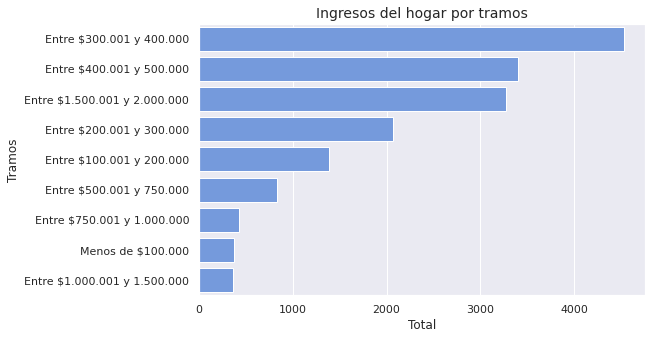

In [ ]:
#Gráfico de barra por tramos de ingreso del hogar
reg = df['tram_ingr'].value_counts().sort_values(ascending=False)
orden =reg.index
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
sns.countplot(y='tram_ingr', data=df, color='cornflowerblue', order=orden)
plt.ylabel('Tramos')
plt.xlabel('Total')
plt.title('Ingresos del hogar por tramos',fontsize=14)
plt.show()

In [ ]:
#Agrupando en subset para presentar en tabla en orden según categoría
tr_ingr = pd.DataFrame(df.groupby("DP_16").agg({"SbjNum":"count"}).head(10).reset_index())
tr_ingr.columns = ['Tramo_ingreso', 'N_encuestados']
tr_ingr



,Tramo_ingreso,N_encuestados
0,1.0,373
1,2.0,1387
2,3.0,2067
3,4.0,4527
4,5.0,3400
5,6.0,829
6,7.0,433
7,8.0,369
8,9.0,3277


In [ ]:
#Codificando nuevamente los valores con etiquetas correspondientes para mejor comprensión y mantener un orden ascendente por la categoría.
tr_ingr['Tramos'] = tr_ingr['Tramo_ingreso'].map( {
1: 'Menos de $100.000',
2: 'Entre $100.001 y 200.000',
3: 'Entre $200.001 y 300.000',
4: 'Entre $300.001 y 400.000',
5: 'Entre $400.001 y 500.000',
6: 'Entre $500.001 y 750.000',
7: 'Entre $750.001 y 1.000.000',
8: 'Entre $1.000.001 y 1.500.000',
9: 'Entre $1.500.001 y 2.000.000',
10: 'Más de $2.000.000',
88: 'No sabe',
99: 'No contesta'}

                                       ).astype(object)
tr_ingr.drop(columns=['Tramo_ingreso'],inplace=True)
tr_ingr= tr_ingr[['Tramos','N_encuestados']]


In [ ]:
tr_ingr

,Tramos,N_encuestados
0,Menos de $100.000,373
1,Entre $100.001 y 200.000,1387
2,Entre $200.001 y 300.000,2067
3,Entre $300.001 y 400.000,4527
4,Entre $400.001 y 500.000,3400
5,Entre $500.001 y 750.000,829
6,Entre $750.001 y 1.000.000,433
7,Entre $1.000.001 y 1.500.000,369
8,Entre $1.500.001 y 2.000.000,3277


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


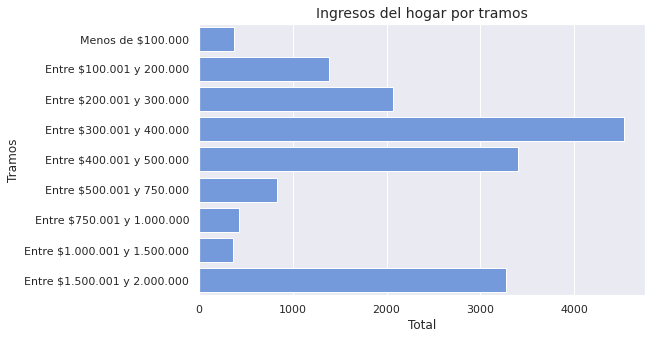

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
x = tr_ingr['N_encuestados']
y= tr_ingr['Tramos']
sns.barplot (x , y , color='cornflowerblue')
plt.ylabel('Tramos')
plt.xlabel('Total')
plt.title('Ingresos del hogar por tramos',fontsize=14)
plt.show()

+ **Nivel educacional alcanzado**

In [ ]:
#¿Cuál es el nivel educacional más alto alcanzado o el nivel educacional actual de usted?
df["DP_12"].value_counts()


6.0     5722
10.0    3307
4.0     2657
9.0     2136
8.0     1407
7.0      536
5.0      323
12.0     153
11.0     128
3.0      112
88.0      68
1.0       64
13.0      27
2.0       22
Name: DP_12, dtype: int64

In [ ]:
#Codificando en nueva columna nivel educacional
df['educ_niv'] = df['DP_12'].map( {
1: 'Nunca asistió',
2: 'Educación Especial (Diferencial)',
3: 'Primaria o preparatoria (Sistema antiguo)',
4: 'Educación Básica',
5: 'Humanidades (Sistema antiguo)',
6: 'Educación Media Científico Humanista',
7: 'Técnica Comercial, Industrial o Normalista (Sistema antiguo)',
8: 'Educación Media Técnico Profesional',
9: 'Técnico de Nivel Superior',
10: 'Profesional',
11: 'Postítulo',
12: 'Magíster',
13: 'Doctorado',
88: 'No sabe'}
                                       ).astype(object)

<ipython-input-41-22127963415f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['educ_niv'] = df['DP_12'].map( {


In [ ]:
df["educ_niv"].value_counts()

Educación Media Científico Humanista                            5722
Profesional                                                     3307
Educación Básica                                                2657
Técnico de Nivel Superior                                       2136
Educación Media Técnico Profesional                             1407
Técnica Comercial, Industrial o Normalista (Sistema antiguo)     536
Humanidades (Sistema antiguo)                                    323
Magíster                                                         153
Postítulo                                                        128
Primaria o preparatoria (Sistema antiguo)                        112
No sabe                                                           68
Nunca asistió                                                     64
Doctorado                                                         27
Educación Especial (Diferencial)                                  22
Name: educ_niv, dtype: int64

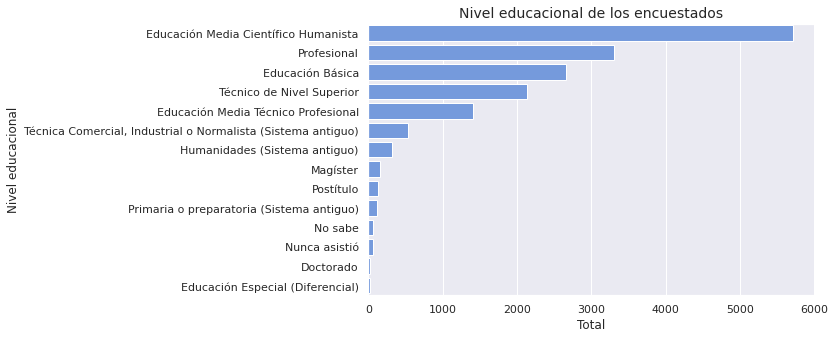

In [ ]:
#Gráfico de barra por nivel educacional
ord = df['educ_niv'].value_counts().sort_values(ascending=False)
orden =ord.index
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
sns.countplot(y='educ_niv', data=df, color='cornflowerblue', order=orden)
plt.ylabel('Nivel educacional')
plt.xlabel('Total')
plt.title('Nivel educacional de los encuestados',fontsize=14)
plt.show()

+ **Sistema previsional de salud**

In [ ]:
#¿A qué sistema previsional de salud pertenece usted?
df["DP_9"].value_counts()

2.0     3955
1.0     3045
5.0     2139
3.0     2116
4.0     1897
7.0     1816
88.0     654
8.0      552
6.0      243
9.0      131
99.0     114
Name: DP_9, dtype: int64

In [ ]:
#Codificando sistema previsional de salud
df['sis_sld'] = df['DP_9'].map( {
1: 'FONASA A',
2: 'FONASA B',
3: 'FONASA C',
4: 'FONASA D',
5: 'FONASA no sabe grupo',
6: 'FF. AA. y del Orden',
7: 'ISAPRE',
8: 'particular',
9: 'Otro sistema',
88: 'No sabe',
99: 'No contesta'}
                                       ).astype(object)

<ipython-input-45-c54ed64a05d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sis_sld'] = df['DP_9'].map( {


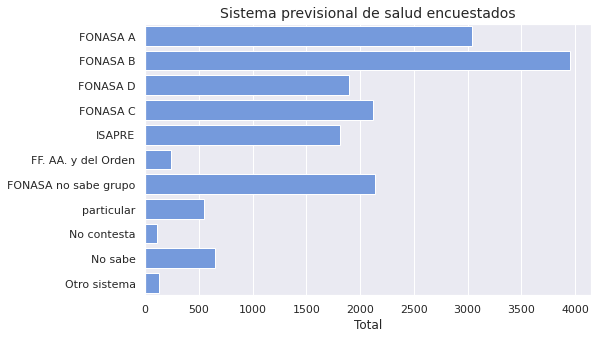

In [ ]:
#Gráfico de barra por sistema previsional de salud
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
sns.countplot(y='sis_sld', data=df, color='cornflowerblue')
plt.ylabel('')
plt.xlabel('Total')
plt.title('Sistema previsional de salud encuestados',fontsize=14)
plt.show()

+ **Información laboral**

In [ ]:
#La semana pasada, ¿trabajó al menos una hora, sin considerar los quehaceres del hogar?
df["CO_1"] = df["CO_1"].astype("category")
df["CO_1"].value_counts()


<ipython-input-47-6adb84b37a3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CO_1"] = df["CO_1"].astype("category")


1.0    9550
2.0    7112
Name: CO_1, dtype: int64

In [ ]:
filtr =df['S02'] <18
data_menore = df[filtr]
data_menore.shape

(1127, 26)

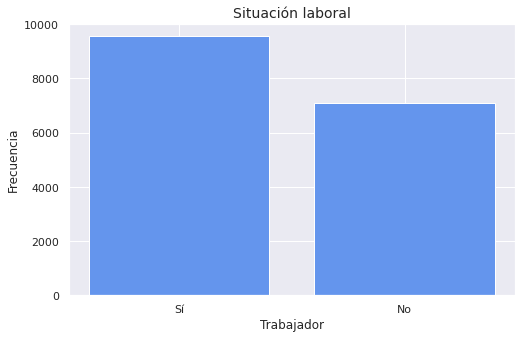

In [ ]:
#Gráfico situación laboral
valores=list(df.groupby('CO_1')['SbjNum'].count())
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
plt.bar(['Sí','No'],valores, color='cornflowerblue')
plt.xlabel('Trabajador')
plt.ylabel('Frecuencia')
plt.title('Situación laboral',fontsize=14)
plt.show()

In [ ]:
#Codificando en nueva columna area laboral del encuestado
df['area_lab'] = df['CO_6'].map( {
1: 'Patrón o empleador/a',
2: 'Trabajador/a por cuenta propia',
3: 'Empleado/a u obrero/a del sector público (gobierno central o municipal)',
4: 'Empleado/a u obrero/a de empresas públicas',
5: 'Empleado/a u obrero/a del sector privado',
6: 'Servicio doméstico puertas adentro',
7: 'Servicio doméstico puertas afuera',
8: 'FF.AA. y del Orden',
9: 'Familiar no remunerado'}
                                       ).astype(object)

<ipython-input-50-f439c2e2ce66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_lab'] = df['CO_6'].map( {


In [ ]:
df["area_lab"].value_counts()

Empleado/a u obrero/a del sector privado                                   4614
Trabajador/a por cuenta propia                                             3482
Empleado/a u obrero/a de empresas públicas                                 1051
Empleado/a u obrero/a del sector público (gobierno central o municipal)     926
Patrón o empleador/a                                                        549
Familiar no remunerado                                                      427
Servicio doméstico puertas afuera                                           270
Servicio doméstico puertas adentro                                           46
FF.AA. y del Orden                                                           37
Name: area_lab, dtype: int64

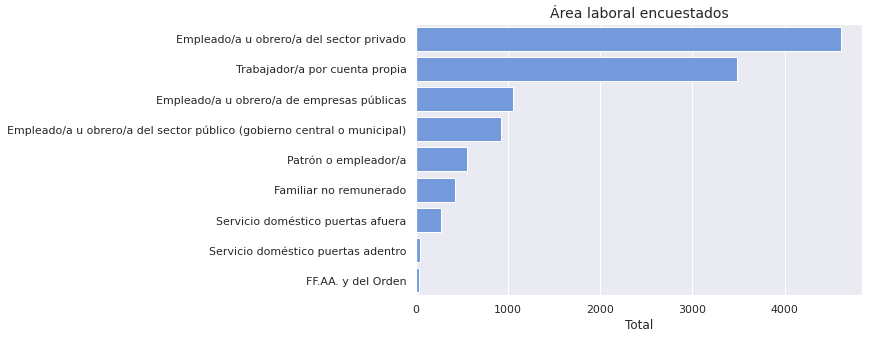

In [ ]:
#Gráfico de barra por Área laboral encuestados
reg = df['area_lab'].value_counts().sort_values(ascending=False)
orden =reg.index
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
sns.countplot(y='area_lab', data=df, color='cornflowerblue', order=orden)
plt.ylabel('')
plt.xlabel('Total')
plt.title('Área laboral encuestados',fontsize=14)
plt.show()

In [ ]:
#Reemplazo valores nulos de quienes señalaron no trabajar en pregunta anterior.
df.fillna({'area_lab': 'No trabaja'}, inplace=True)
df['area_lab'].value_counts()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


No trabaja                                                                 5260
Empleado/a u obrero/a del sector privado                                   4614
Trabajador/a por cuenta propia                                             3482
Empleado/a u obrero/a de empresas públicas                                 1051
Empleado/a u obrero/a del sector público (gobierno central o municipal)     926
Patrón o empleador/a                                                        549
Familiar no remunerado                                                      427
Servicio doméstico puertas afuera                                           270
Servicio doméstico puertas adentro                                           46
FF.AA. y del Orden                                                           37
Name: area_lab, dtype: int64

+ **Tipo de barrio**

In [ ]:
# Calidad del barrio, a partir de la observación del propio encuestador y sin preguntar directamente al encuestado
df["DP_18"].value_counts()

3.0    8085
2.0    5688
4.0    2398
1.0     409
5.0      82
Name: DP_18, dtype: int64

In [ ]:
#Codificando valores con etiquetas correspondientes y agregando como columna nueva
df['tip_barrio'] = df['DP_18'].map( {
1: 'Barrio residencial elegante',
2: 'Barrio residencial',
3: 'Barrios de comercio o calles estrechas, sin áreas verdes',
4: 'Barrio obrero o barrio populoso o mal ventilado',
5: 'Barrio de mejoras y pocilgas desaseadas, sin pavimentación',
}

                                       ).astype(object)

<ipython-input-55-3cb76b900fb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tip_barrio'] = df['DP_18'].map( {


In [ ]:
df["tip_barrio"].value_counts()

Barrios de comercio o calles estrechas, sin áreas verdes      8085
Barrio residencial                                            5688
Barrio obrero o barrio populoso o mal ventilado               2398
Barrio residencial elegante                                    409
Barrio de mejoras y pocilgas desaseadas, sin pavimentación      82
Name: tip_barrio, dtype: int64

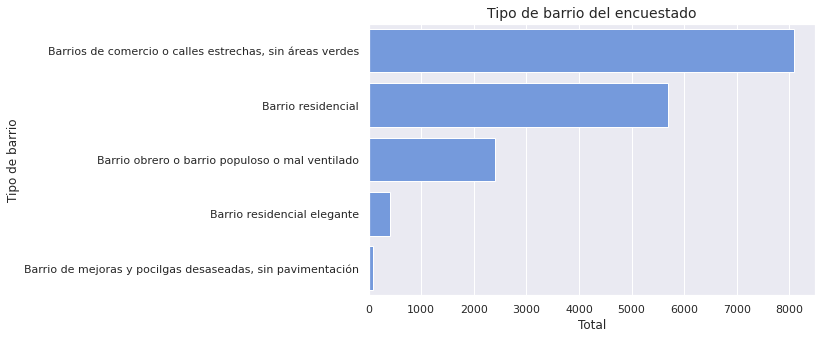

In [ ]:
#Gráfico de barra por tipo de barrio
reg = df['tip_barrio'].value_counts().sort_values(ascending=False)
orden =reg.index
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
sns.countplot(y='tip_barrio', data=df, color='cornflowerblue', order=orden)
plt.ylabel('Tipo de barrio')
plt.xlabel('Total')
plt.title('Tipo de barrio del encuestado',fontsize=14)
plt.show()

In [ ]:
#Revisión de valores nulos.
print(df.isnull().sum().sort_values(ascending = False))
na_por = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print('##################################')
print('Valores porcentuales de nulos')
print(na_por)

COC_4         15892
MAR_4         11629
CO_6           5260
OH_4           4023
SbjNum            0
area_lab          0
sis_sld           0
educ_niv          0
tram_ingr         0
est_salud         0
edad_cat          0
macrozona         0
REGIONNOM         0
DP_9              0
COC_1             0
MAR_1             0
S01               0
ST_1              0
OH_1              0
DP_18             0
CO_1              0
DP_12             0
DP_16             0
DP_5              0
DP_2              0
S02               0
REGION            0
tip_barrio        0
dtype: int64
##################################
Valores porcentuales de nulos
COC_4         95.378706
MAR_4         69.793542
CO_6          31.568839
OH_4          24.144761
SbjNum         0.000000
area_lab       0.000000
sis_sld        0.000000
educ_niv       0.000000
tram_ingr      0.000000
est_salud      0.000000
edad_cat       0.000000
macrozona      0.000000
REGIONNOM      0.000000
DP_9           0.000000
COC_1          0.000000
MA

## **Variables sobre consumo de alcohol y drogas** ##

+ Alcohol

In [ ]:
#Pregunta ¿Ha tomado Ud. alcohol alguna vez en su vida?

df["OH_1"].value_counts()

1.0     12639
2.0      4004
88.0       16
99.0        3
Name: OH_1, dtype: int64

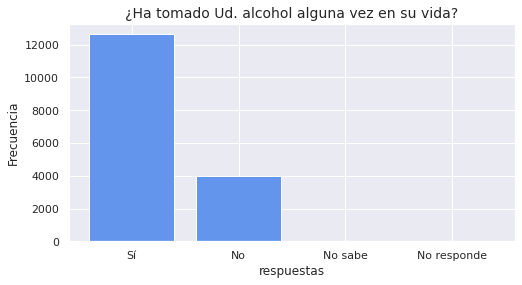

In [ ]:
#Gráfica ¿Ha tomado Ud. alcohol alguna vez en su vida?
valoh=list(df.groupby('OH_1')['SbjNum'].count())
plt.figure(figsize=(8,4))
sns.set_theme(style="darkgrid")
plt.bar(['Sí','No', 'No sabe','No responde'],valoh, color='cornflowerblue')
plt.xlabel('respuestas')
plt.ylabel('Frecuencia')
plt.title('¿Ha tomado Ud. alcohol alguna vez en su vida?',fontsize=14)
plt.show()

In [ ]:
#Pregunta ¿Cuándo fue la última vez que Ud. consumió alcohol?
df["OH_4"].value_counts()

1.0     6519
3.0     3556
2.0     2437
88.0      99
99.0      28
Name: OH_4, dtype: int64

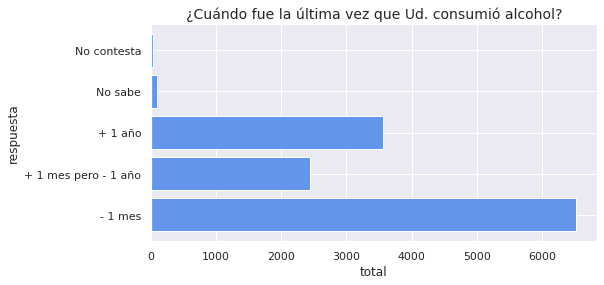

In [ ]:
#Gráfica ¿Cuándo fue la última vez que Ud. consumió alcohol?
valohl=list(df.groupby('OH_4')['SbjNum'].count())
plt.figure(figsize=(8,4))
sns.set_theme(style="darkgrid")
plt.barh(['- 1 mes','+ 1 mes pero - 1 año', '+ 1 año','No sabe','No contesta'],valohl, color='cornflowerblue')
plt.xlabel('total')
plt.ylabel('respuesta')
plt.title('¿Cuándo fue la última vez que Ud. consumió alcohol?',fontsize=14)
plt.show()

In [ ]:
#Agrego columna donde indico si el encuestado es consumidor (1) o no (0), considero consumidores sólo a los que lo han hecho dentro del mes.
df['alh_cons'] = df['OH_4'].map( {
1: 'Sí',
2: 'No',
3: 'No',
88: 'No',
99: 'No',
}
 ).astype(object)

<ipython-input-88-c0a78916c3ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alh_cons'] = df['OH_4'].map( {


In [ ]:
df['alh_cons'].value_counts()

Sí    6519
No    6120
Name: alh_cons, dtype: int64

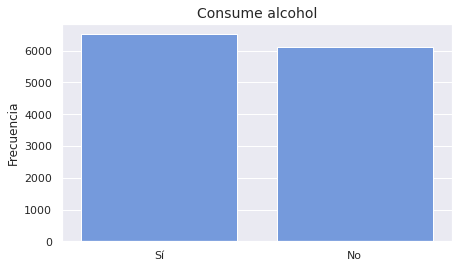

In [ ]:
#Gráfica
plt.figure(figsize=(7,4))
sns.set_theme(style="darkgrid")
sns.countplot(x="alh_cons", data=df, color='cornflowerblue')
plt.title('Consume alcohol',fontsize=14)
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
#Reemplazo valores nulos por 0 de no consumidores
df.fillna({'alh_cons': 'No'}, inplace=True)
df['alh_cons'].value_counts()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


No    10143
Sí     6519
Name: alh_cons, dtype: int64

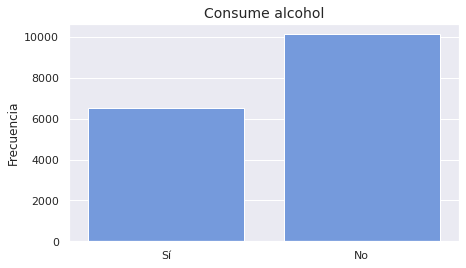

In [ ]:
#Gráfica
plt.figure(figsize=(7,4))
sns.set_theme(style="darkgrid")
sns.countplot(x="alh_cons", data=df, color='cornflowerblue')
plt.title('Consume alcohol',fontsize=14)
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.show()

+ Marihuana

In [ ]:
#Pregunta ¿Ha probado Ud. marihuana alguna vez en su vida?
df["MAR_1"].value_counts()

2.0     11583
1.0      5033
88.0       38
99.0        8
Name: MAR_1, dtype: int64

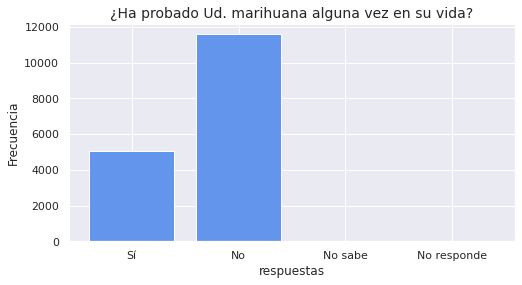

In [ ]:
#Gráfica ¿Ha probado Ud. marihuana alguna vez en su vida?
valmr=list(df.groupby('MAR_1')['SbjNum'].count())
plt.figure(figsize=(8,4))
sns.set_theme(style="darkgrid")
plt.bar(['Sí','No', 'No sabe','No responde'],valmr, color='cornflowerblue')
plt.xlabel('respuestas')
plt.ylabel('Frecuencia')
plt.title('¿Ha probado Ud. marihuana alguna vez en su vida?',fontsize=14)
plt.show()

In [ ]:
#Pregunta MAR_4) ¿Cuándo fue la última vez que Ud. consumió marihuana?
df['MAR_4'].value_counts()

3.0     3566
1.0      942
2.0      464
88.0      46
99.0      15
Name: MAR_4, dtype: int64

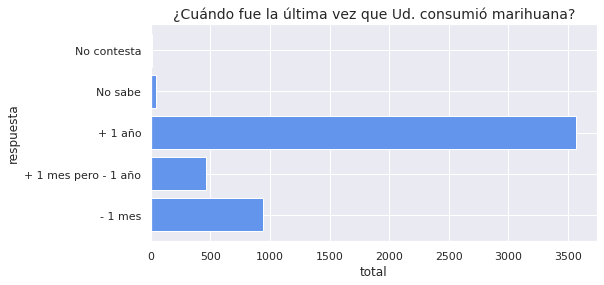

In [ ]:
#Gráfica ¿Cuándo fue la última vez que Ud. consumió marihuana?
valohl=list(df.groupby('MAR_4')['SbjNum'].count())
plt.figure(figsize=(8,4))
sns.set_theme(style="darkgrid")
plt.barh(['- 1 mes','+ 1 mes pero - 1 año', '+ 1 año','No sabe','No contesta'],valohl, color='cornflowerblue')
plt.xlabel('total')
plt.ylabel('respuesta')
plt.title('¿Cuándo fue la última vez que Ud. consumió marihuana?',fontsize=14)
plt.show()

In [ ]:
#Agrego columna donde indico si el encuestado es consumidor (1) o no (0), considero consumidores a los que lo han hecho dentro del mes y hace menos de un año.
df['mar_cons'] = df['MAR_4'].map( {
1: 'Sí',
2: 'Sí',
3: 'No',
88: 'No',
99: 'No',
}
 ).astype(object)


<ipython-input-97-5520c8cbda45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mar_cons'] = df['MAR_4'].map( {


In [ ]:
df['mar_cons'].value_counts()

No    3627
Sí    1406
Name: mar_cons, dtype: int64

In [ ]:
#Reemplazo valores nulos por 0 de no consumidores
df.fillna({'mar_cons': 'No'}, inplace=True)
df['mar_cons'].value_counts()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


No    15256
Sí     1406
Name: mar_cons, dtype: int64

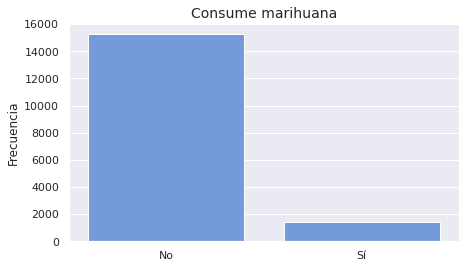

In [ ]:
#Gráfica
plt.figure(figsize=(7,4))
sns.set_theme(style="darkgrid")
sns.countplot(x="mar_cons", data=df, color='cornflowerblue')
plt.title('Consume marihuana',fontsize=14)
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.show()

+ Cocaína

In [ ]:
#Pregunta ¿Ha probado Ud. cocaína alguna vez en su vida?
df["COC_1"].value_counts()

2.0     15846
1.0       770
88.0       34
99.0       12
Name: COC_1, dtype: int64

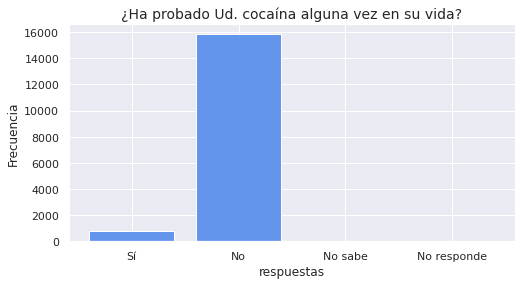

In [ ]:
#Gráfica ¿Ha probado Ud. cocaína alguna vez en su vida?
valc=list(df.groupby('COC_1')['SbjNum'].count())
plt.figure(figsize=(8,4))
sns.set_theme(style="darkgrid")
plt.bar(['Sí','No', 'No sabe','No responde'],valc, color='cornflowerblue')
plt.xlabel('respuestas')
plt.ylabel('Frecuencia')
plt.title('¿Ha probado Ud. cocaína alguna vez en su vida?',fontsize=14)
plt.show()

In [ ]:
#Pregunta¿Cuándo fue la última vez que Ud. consumió cocaína?
df['COC_4'].value_counts()

3.0     673
2.0      47
1.0      35
88.0     12
99.0      3
Name: COC_4, dtype: int64

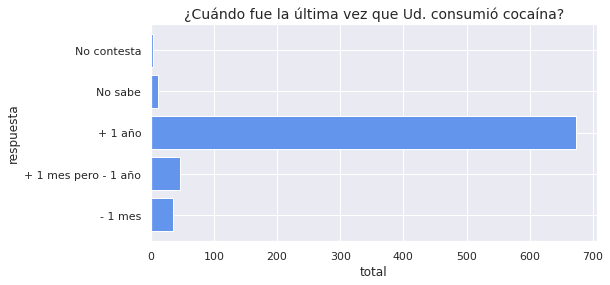

In [ ]:
#Gráfica ¿Cuándo fue la última vez que Ud. consumió cocaína?
valohl=list(df.groupby('COC_4')['SbjNum'].count())
plt.figure(figsize=(8,4))
sns.set_theme(style="darkgrid")
plt.barh(['- 1 mes','+ 1 mes pero - 1 año', '+ 1 año','No sabe','No contesta'],valohl, color='cornflowerblue')
plt.xlabel('total')
plt.ylabel('respuesta')
plt.title('¿Cuándo fue la última vez que Ud. consumió cocaína?',fontsize=14)
plt.show()

In [ ]:
#Agrego columna donde indico si el encuestado es consumidor (1) o no (0),considero consumidores a los que lo han hecho dentro del mes y hace menos de un año.
df['coc_cons'] = df['COC_4'].map( {
1: 'Sí',
2: 'Sí',
3: 'No',
88: 'No',
99: 'No',
}
                                       ).astype(object)

<ipython-input-105-c24da85dc459>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['coc_cons'] = df['COC_4'].map( {


In [ ]:
df.fillna({'coc_cons': 'No'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df['coc_cons'].value_counts()

No    16580
Sí       82
Name: coc_cons, dtype: int64

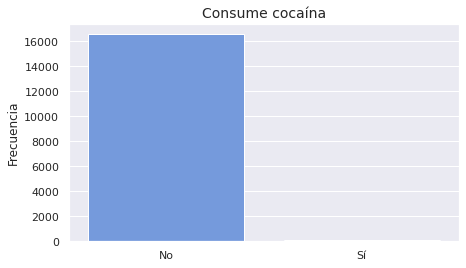

In [ ]:
#Gráfica
plt.figure(figsize=(7,4))
sns.set_theme(style="darkgrid")
sns.countplot(x="coc_cons", data=df, color='cornflowerblue')
plt.title('Consume cocaína',fontsize=14)
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.show()

## **Análisis bivariado** ##

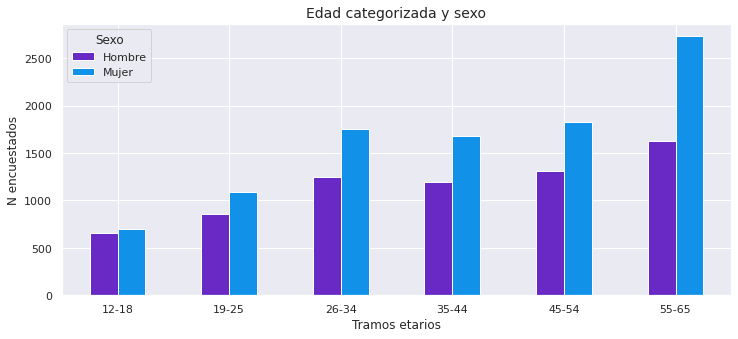

In [ ]:
pd.crosstab(df.edad_cat,df.S01).plot(kind="bar",figsize=(12,5),color=['#6929c4','#1192e8'])
plt.title('Edad categorizada y sexo', fontsize=14)
plt.xlabel('Tramos etarios')
plt.xticks(rotation=0)
plt.ylabel('N encuestados')
plt.legend(title='Sexo')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


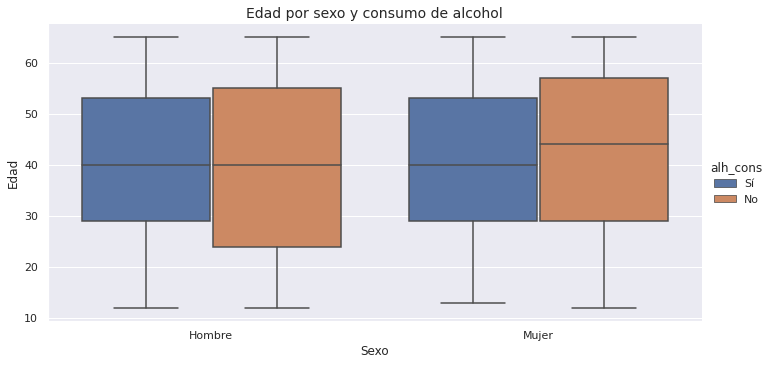

In [ ]:

sns.factorplot(x = "S01", y = "S02", hue = "alh_cons",data = df, kind = "box" , size=5, aspect=2)
plt.title('Edad por sexo y consumo de alcohol', fontsize=14)
plt.xlabel('Sexo')
plt.ylabel('Edad')

plt.show()


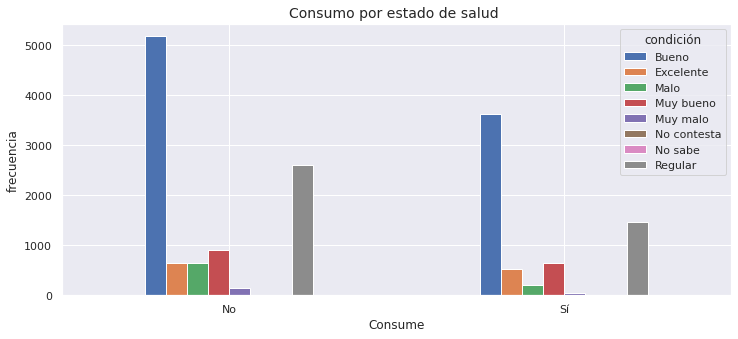

In [ ]:
pd.crosstab(df.alh_cons,df.est_salud).plot(kind="bar",figsize=(12,5))
plt.title('Consumo por estado de salud ', fontsize=14)
plt.xlabel('Consume')
plt.xticks(rotation=0)
plt.ylabel('frecuencia')
plt.legend(title='condición')
plt.show()

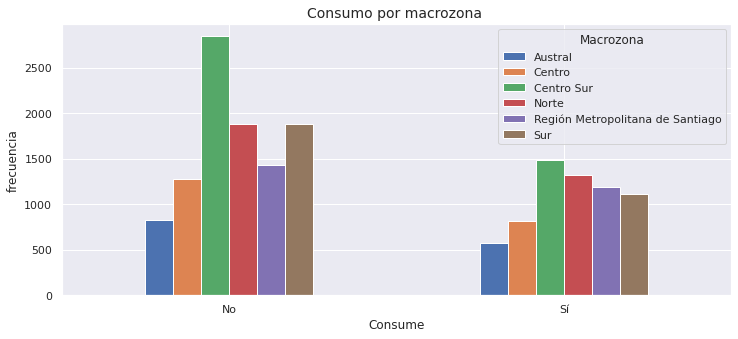

In [ ]:
pd.crosstab(df.alh_cons,df.macrozona).plot(kind="bar",figsize=(12,5))
plt.title('Consumo por macrozona ', fontsize=14)
plt.xlabel('Consume')
plt.xticks(rotation=0)
plt.ylabel('frecuencia')
plt.legend(title='Macrozona')
plt.show()

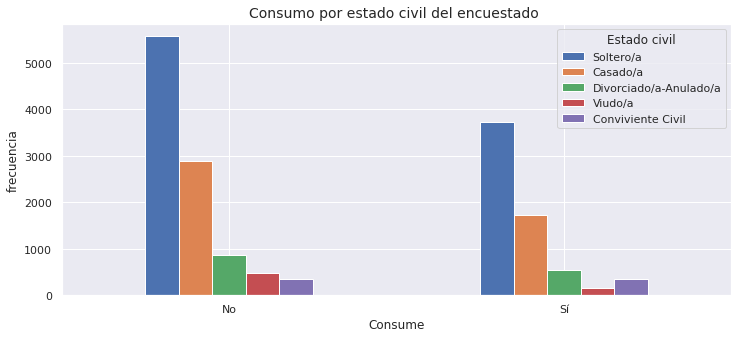

In [ ]:
pd.crosstab(df.alh_cons,df.DP_2).plot(kind="bar",figsize=(12,5))
plt.title('Consumo por estado civil del encuestado ', fontsize=14)
plt.xlabel('Consume')
plt.xticks(rotation=0)
plt.ylabel('frecuencia')
plt.legend(title='Estado civil')
plt.show()

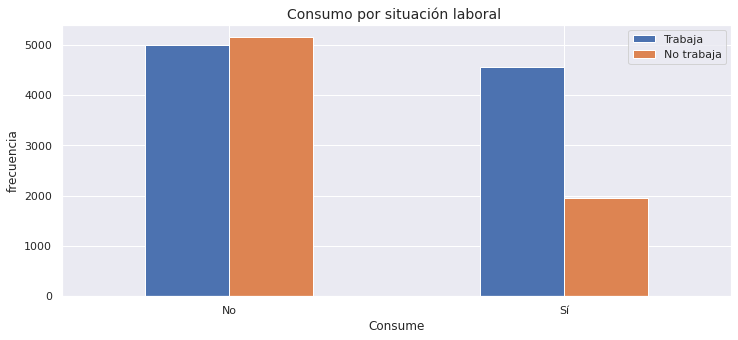

In [ ]:
pd.crosstab(df.alh_cons,df.CO_1).plot(kind="bar",figsize=(12,5))
plt.title('Consumo por situación laboral ', fontsize=14)
plt.xlabel('Consume')
plt.xticks(rotation=0)
plt.ylabel('frecuencia')
plt.legend(['Trabaja','No trabaja'])
plt.show()

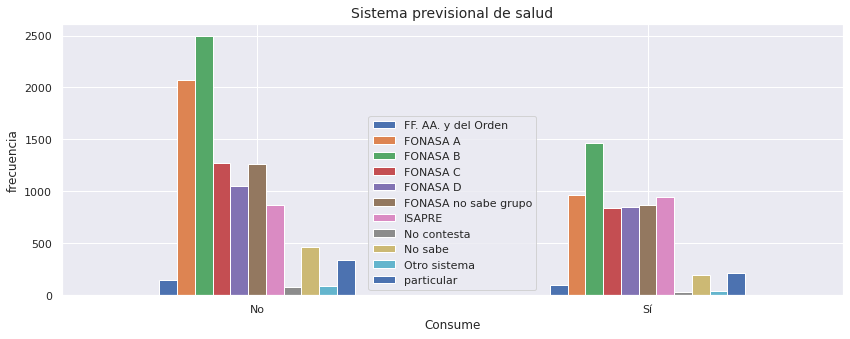

In [ ]:
pd.crosstab(df.alh_cons,df.sis_sld).plot(kind="bar",figsize=(14,5))
plt.title('Sistema previsional de salud', fontsize=14)
plt.xlabel('Consume')
plt.xticks(rotation=0)
plt.ylabel('frecuencia')
plt.legend()
plt.show()

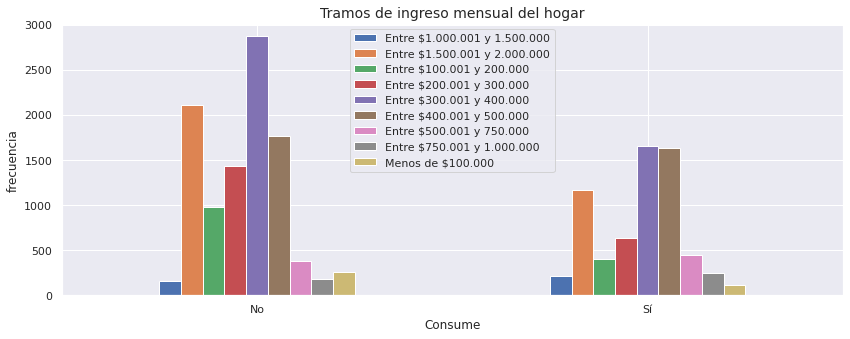

In [ ]:
pd.crosstab(df.alh_cons,df.tram_ingr).plot(kind="bar",figsize=(14,5))
plt.title('Tramos de ingreso mensual del hogar', fontsize=14)
plt.xlabel('Consume')
plt.xticks(rotation=0)
plt.ylabel('frecuencia')
plt.legend()
plt.show()

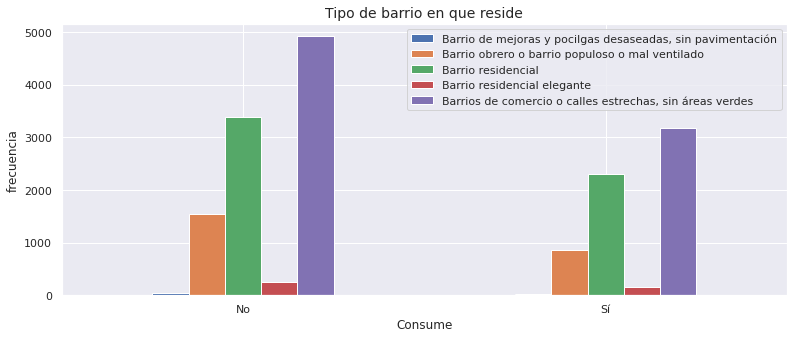

In [ ]:
pd.crosstab(df.alh_cons,df.tip_barrio).plot(kind="bar",figsize=(13,5))
plt.title('Tipo de barrio en que reside', fontsize=14)
plt.xlabel('Consume')
plt.xticks(rotation=0)
plt.ylabel('frecuencia')
plt.legend()
plt.show()

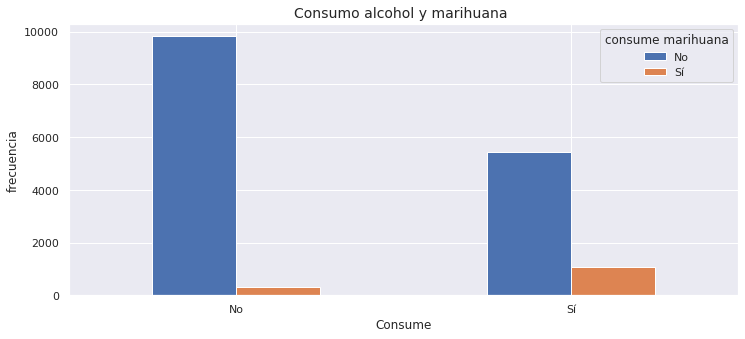

In [ ]:
pd.crosstab(df.alh_cons,df.mar_cons).plot(kind="bar",figsize=(12,5))
plt.title('Consumo alcohol y marihuana ', fontsize=14)
plt.xlabel('Consume')
plt.xticks(rotation=0)
plt.ylabel('frecuencia')
plt.legend(['No','Sí'],title='consume marihuana')
plt.show()

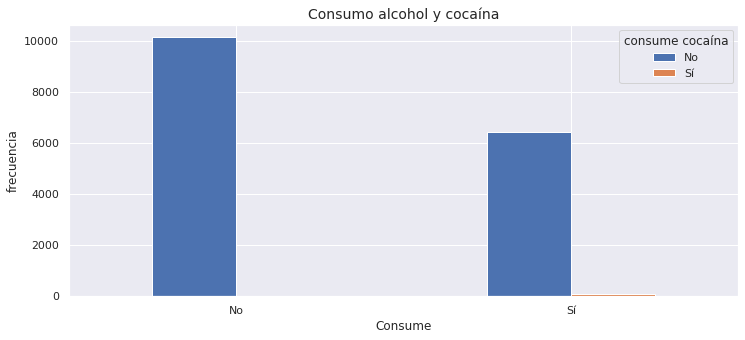

In [ ]:
pd.crosstab(df.alh_cons,df.coc_cons).plot(kind="bar",figsize=(12,5))
plt.title('Consumo alcohol y cocaína', fontsize=14)
plt.xlabel('Consume')
plt.xticks(rotation=0)
plt.ylabel('frecuencia')
plt.legend(['No','Sí'],title='consume cocaína')
plt.show()

## **Cluster con K-Modes** ##

In [ ]:
#Nueva base de datos para cluster
df2 = df[['S01','REGIONNOM','macrozona','edad_cat','est_salud','tram_ingr',
            'educ_niv','sis_sld','area_lab','tip_barrio','alh_cons','mar_cons','coc_cons']]

In [ ]:
 #Tipo de datos
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16662 entries, 0 to 16661
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   S01         16662 non-null  category
 1   REGIONNOM   16662 non-null  object  
 2   macrozona   16662 non-null  object  
 3   edad_cat    16662 non-null  category
 4   est_salud   16662 non-null  object  
 5   tram_ingr   16662 non-null  object  
 6   educ_niv    16662 non-null  object  
 7   sis_sld     16662 non-null  object  
 8   area_lab    16662 non-null  object  
 9   tip_barrio  16662 non-null  object  
 10  alh_cons    16662 non-null  object  
 11  mar_cons    16662 non-null  object  
 12  coc_cons    16662 non-null  object  
dtypes: category(2), object(11)
memory usage: 2.1+ MB


In [ ]:
# codificar a variables numéricas
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df3 = df2.apply(le.fit_transform)
df3.head()

,S01,REGIONNOM,macrozona,edad_cat,est_salud,tram_ingr,educ_niv,sis_sld,area_lab,tip_barrio,alh_cons,mar_cons,coc_cons
0,1,6,1,3,0,3,3,1,5,1,1,0,0
1,1,6,1,4,7,3,3,2,9,1,1,0,0
2,0,6,1,3,0,5,4,1,0,1,1,0,0
3,0,6,1,0,0,4,12,4,5,2,0,0,0
4,1,6,1,3,0,1,3,2,5,1,0,0,0


In [ ]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kmodes.kmodes import KModes

In [ ]:
# Se busca analizar el número óptimo de grupos
cost = []
for num_clusters in list(range(1,5)):
  kmode = KModes(n_clusters=num_clusters, init ='Cao', n_init = 5, verbose=1)
  kmode.fit_predict(df3)
  cost.append(kmode.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 117179.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1955, cost: 105187.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2191, cost: 101976.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2139, cost: 99391.0
Run 1, iteration: 2/100, moves: 635, cost: 99391.0


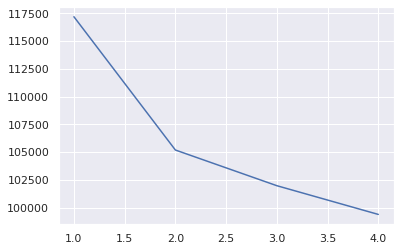

In [ ]:
# Visualizar con método de codo
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost);

In [ ]:
# Objeto Kmodes con número óptimo observado
km = KModes(n_clusters=2, init='Cao', n_init=5, verbose=1)

Initialization method and algorithm are deterministic. Setting n_init to 1.


In [ ]:
# Aplicando modelo con los datos
clusters = km.fit_predict(df2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1955, cost: 105187.0


In [ ]:
# Observando clasificaciones obtenidas
clusters

array([0, 0, 1, ..., 1, 0, 0], dtype=uint16)

In [ ]:
# Creando nueva base combinando dataframes
clusterdf = pd.DataFrame(clusters)
clusterdf.columns = ['cluster']
df4 = pd.concat([df2, clusterdf], axis = 1).reset_index()
df4 = df4.drop(['index'], axis =1)

In [ ]:
df4.head()

,S01,REGIONNOM,macrozona,edad_cat,est_salud,tram_ingr,educ_niv,sis_sld,area_lab,tip_barrio,alh_cons,mar_cons,coc_cons,cluster
0,Mujer,V Región de Valparaíso,Centro,35-44,Bueno,Entre $200.001 y 300.000,Educación Media Científico Humanista,FONASA A,No trabaja,Barrio obrero o barrio populoso o mal ventilado,Sí,No,No,0
1,Mujer,V Región de Valparaíso,Centro,45-54,Regular,Entre $200.001 y 300.000,Educación Media Científico Humanista,FONASA B,Trabajador/a por cuenta propia,Barrio obrero o barrio populoso o mal ventilado,Sí,No,No,0
2,Hombre,V Región de Valparaíso,Centro,35-44,Bueno,Entre $400.001 y 500.000,Educación Media Técnico Profesional,FONASA A,Empleado/a u obrero/a de empresas públicas,Barrio obrero o barrio populoso o mal ventilado,Sí,No,No,1
3,Hombre,V Región de Valparaíso,Centro,12-18,Bueno,Entre $300.001 y 400.000,"Técnica Comercial, Industrial o Normalista (Si...",FONASA D,No trabaja,Barrio residencial,No,No,No,0
4,Mujer,V Región de Valparaíso,Centro,35-44,Bueno,Entre $1.500.001 y 2.000.000,Educación Media Científico Humanista,FONASA B,No trabaja,Barrio obrero o barrio populoso o mal ventilado,No,No,No,0


In [ ]:
df4["cluster"].value_counts()

0    11795
1     4867
Name: cluster, dtype: int64

+ **Visualización de agrupamientos obtenidos**

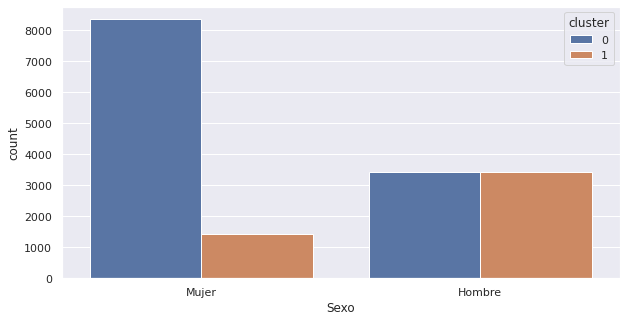

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x=df4['S01'], order=df4['S01'].value_counts().index, hue=df4['cluster'])
plt.xlabel('Sexo')
plt.show()

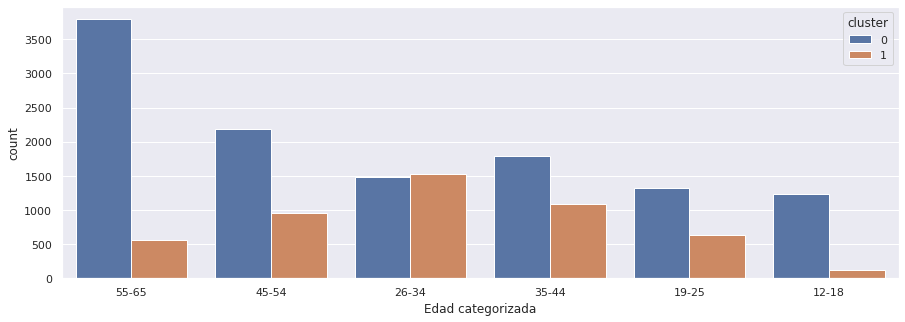

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df4['edad_cat'], order=df4['edad_cat'].value_counts().index, hue=df4['cluster'])
plt.xlabel('Edad categorizada')
plt.show()

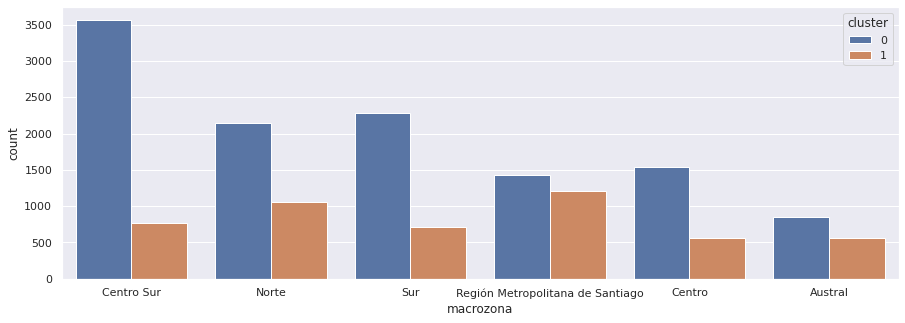

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df4['macrozona'], order=df4['macrozona'].value_counts().index, hue=df4['cluster'])
plt.show()

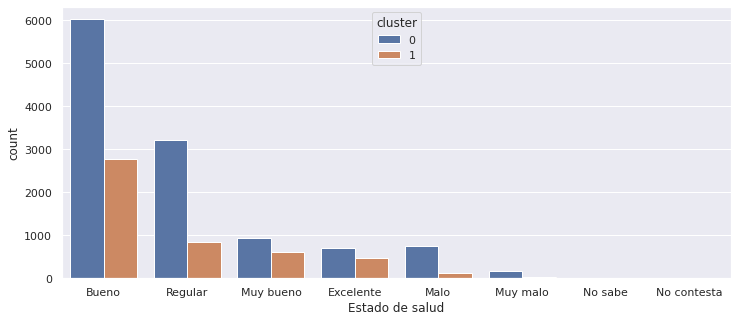

In [ ]:
plt.subplots(figsize = (12,5))
sns.countplot(x=df4['est_salud'], order=df4['est_salud'].value_counts().index, hue=df4['cluster'])
plt.xlabel('Estado de salud')
plt.show()

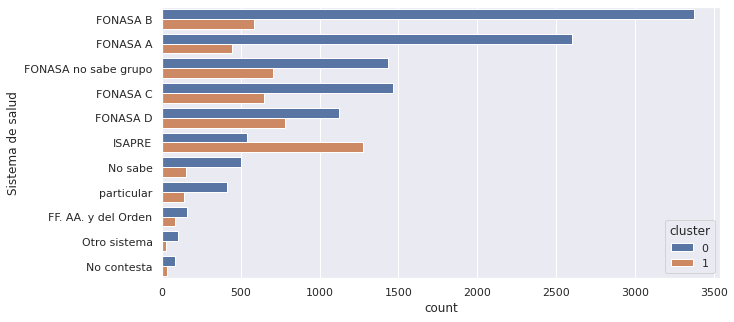

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(y=df4['sis_sld'], order=df4['sis_sld'].value_counts().index, hue=df4['cluster'])
plt.ylabel('Sistema de salud')
plt.show()

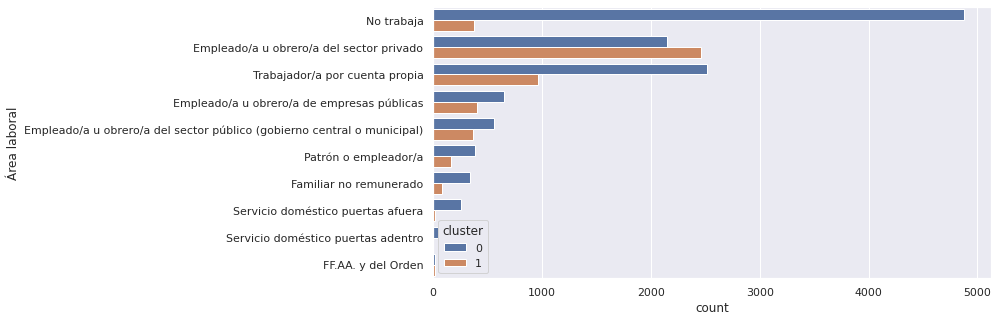

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(y=df4['area_lab'], order=df4['area_lab'].value_counts().index, hue=df4['cluster'])
plt.ylabel('Área laboral')
plt.show()

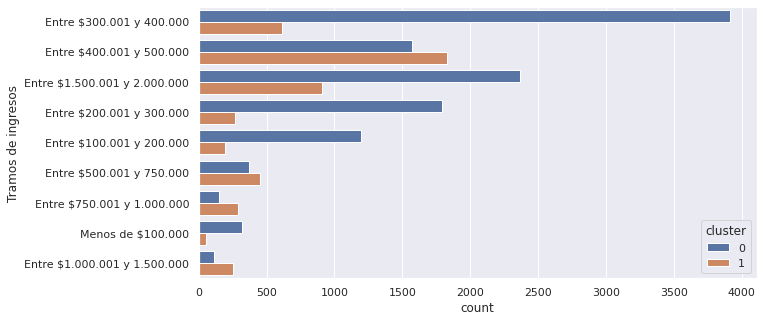

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(y=df4['tram_ingr'], order=df4['tram_ingr'].value_counts().index, hue=df4['cluster'])
plt.ylabel('Tramos de ingresos')
plt.show()

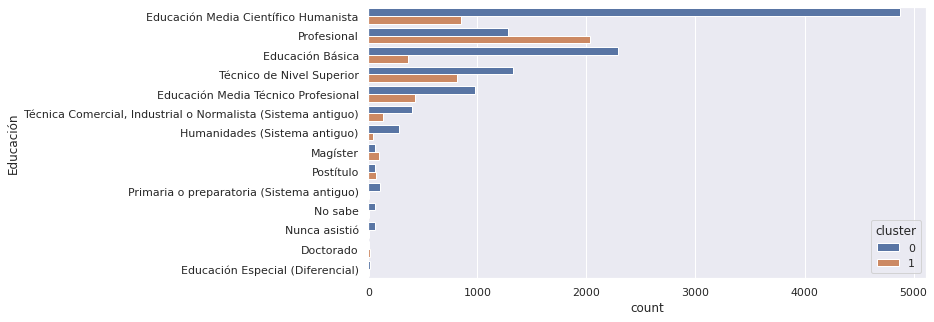

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(y=df4['educ_niv'], order=df4['educ_niv'].value_counts().index, hue=df4['cluster'])
plt.ylabel('Educación')
plt.show()

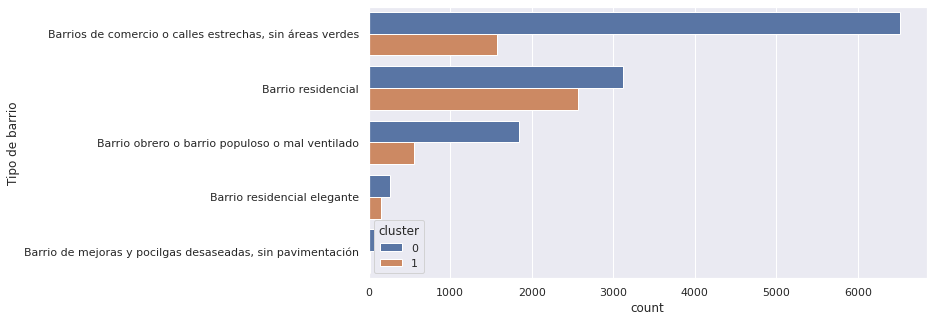

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(y=df4['tip_barrio'], order=df4['tip_barrio'].value_counts().index, hue=df4['cluster'])
plt.ylabel('Tipo de barrio')
plt.show()

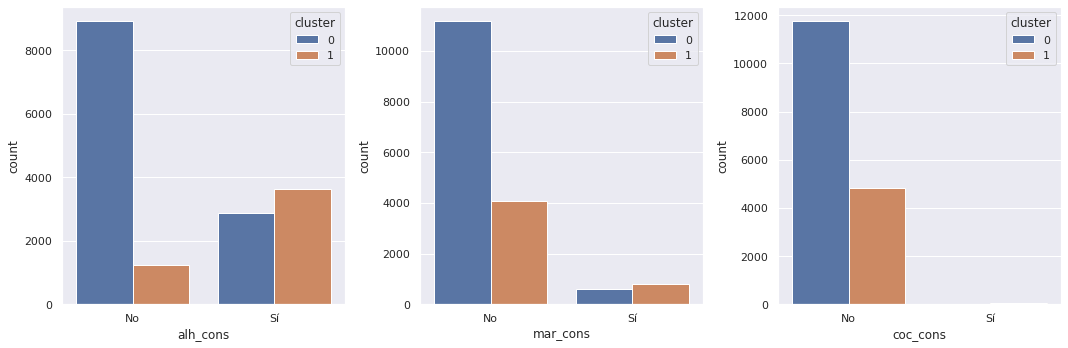

In [ ]:
# clustering por tipo de consumo
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df4['alh_cons'], order=df4['alh_cons'].value_counts().index, hue=df4['cluster'],ax=axs[0])
sns.countplot(x=df4['mar_cons'], order=df4['mar_cons'].value_counts().index, hue=df4['cluster'],ax=axs[1])
sns.countplot(x=df4['coc_cons'], order=df4['coc_cons'].value_counts().index, hue=df4['cluster'],ax=axs[2])

plt.tight_layout()
plt.show()

## **Modelamiento** ##

+ **Preparación de la data**

In [ ]:
# Reordeno base de datos, aprovecho variables originales que poseen codificación numérica y las demás las transformaré a dummies
df4= df[['SbjNum','S01','REGION','DP_2','edad_cat','ST_1','DP_16',
            'DP_12','DP_9','area_lab','DP_18','alh_cons','mar_cons','coc_cons']]

In [ ]:
# Identifico columnas
df4 = df4.rename(columns={'ST_1':'est_salud'})
df4 = df4.rename(columns={'DP_2':'est_civil'})
df4 = df4.rename(columns={'DP_16':'ingresos'})
df4 = df4.rename(columns={'DP_12':'educación'})
df4 = df4.rename(columns={'DP_9':'sist_salud'})
df4 = df4.rename(columns={'DP_18':'tipo_barrio'})

In [ ]:
df4['alh_cons'] = np.where((df4["alh_cons"])== 'Sí', 1, 0)
df4['mar_cons'] = np.where((df4["mar_cons"])== 'Sí', 1, 0)
df4['coc_cons'] = np.where((df4["coc_cons"])== 'Sí', 1, 0);


In [ ]:
df4.head()

,SbjNum,S01,REGION,est_civil,edad_cat,est_salud,ingresos,educación,sist_salud,area_lab,tipo_barrio,alh_cons,mar_cons,coc_cons
0,379435.0,Mujer,5.0,Soltero/a,35-44,4.0,3.0,6.0,1.0,No trabaja,4.0,1,0,0
1,380894.0,Mujer,5.0,Divorciado/a-Anulado/a,45-54,3.0,3.0,6.0,2.0,Trabajador/a por cuenta propia,4.0,1,0,0
2,380948.0,Hombre,5.0,Soltero/a,35-44,4.0,5.0,8.0,1.0,Empleado/a u obrero/a de empresas públicas,4.0,1,0,0
3,380975.0,Hombre,5.0,Soltero/a,12-18,4.0,4.0,7.0,4.0,No trabaja,2.0,0,0,0
4,381352.0,Mujer,5.0,Divorciado/a-Anulado/a,35-44,4.0,9.0,6.0,2.0,No trabaja,4.0,0,0,0


In [ ]:
# Genero variables dummies
dfm = pd.get_dummies(data=df4, drop_first=True)
dfm.head(3)

,SbjNum,REGION,est_salud,ingresos,educación,sist_salud,tipo_barrio,alh_cons,mar_cons,coc_cons,...,edad_cat_55-65,area_lab_Empleado/a u obrero/a del sector privado,area_lab_Empleado/a u obrero/a del sector público (gobierno central o municipal),area_lab_FF.AA. y del Orden,area_lab_Familiar no remunerado,area_lab_No trabaja,area_lab_Patrón o empleador/a,area_lab_Servicio doméstico puertas adentro,area_lab_Servicio doméstico puertas afuera,area_lab_Trabajador/a por cuenta propia
0,379435.0,5.0,4.0,3.0,6.0,1.0,4.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,380894.0,5.0,3.0,3.0,6.0,2.0,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,380948.0,5.0,4.0,5.0,8.0,1.0,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Árbol de decisiones 'Consumidores de alcohol'** ##

In [ ]:
# Corto la data para comenzar pruebas con modelos de clasificación
test_id = df4['SbjNum']     # guardo la identificación de los encuestados par comparar resultados
y = dfm['alh_cons']
X = dfm.drop(['SbjNum','alh_cons'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2 )

In [ ]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((13329, 27), (13329,), (3333, 27), (3333,))

In [ ]:
X_train.head(3)

,REGION,est_salud,ingresos,educación,sist_salud,tipo_barrio,mar_cons,coc_cons,S01_Mujer,est_civil_Casado/a,...,edad_cat_55-65,area_lab_Empleado/a u obrero/a del sector privado,area_lab_Empleado/a u obrero/a del sector público (gobierno central o municipal),area_lab_FF.AA. y del Orden,area_lab_Familiar no remunerado,area_lab_No trabaja,area_lab_Patrón o empleador/a,area_lab_Servicio doméstico puertas adentro,area_lab_Servicio doméstico puertas afuera,area_lab_Trabajador/a por cuenta propia
7045,13.0,3.0,2.0,4.0,1.0,3.0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
12577,10.0,4.0,4.0,9.0,7.0,1.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
13849,12.0,3.0,4.0,4.0,3.0,3.0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
# conteo de valores 0= no consume ; 1= sí consume
y.value_counts()

0    10143
1     6519
Name: alh_cons, dtype: int64

In [ ]:
# Determinando mejores parámetros para el árbol de decisión con Grid Search

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
param_grid = {'max_depth': [1, 2, 3, 4, 5,6],
              'min_samples_split': [2, 3, 4, 5,6,7]}
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor precisión en validación cruzada: {:.2f}".format(grid_search.best_score_))

Mejores parámetros:  {'max_depth': 6, 'min_samples_split': 2}
Mejor precisión en validación cruzada: 0.67


In [ ]:
# Determinando mejores parámetros para el árbol de decisión con Randomized Search

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

tree = DecisionTreeClassifier()
param_dist = {'max_depth': [1, 2, 3, 4, 5],
              'min_samples_split': np.arange(2, 10)}
rand_search = RandomizedSearchCV(tree, param_distributions=param_dist, n_iter=10, cv=5)
rand_search.fit(X_train, y_train)

print("Mejores parámetros: ", rand_search.best_params_)
print("Mejor precisión en validación cruzada: {:.2f}".format(rand_search.best_score_))

Mejores parámetros:  {'min_samples_split': 4, 'max_depth': 5}
Mejor precisión en validación cruzada: 0.67


              precision    recall  f1-score   support

           0       0.69      0.81      0.74      2023
           1       0.59      0.44      0.50      1310

    accuracy                           0.66      3333
   macro avg       0.64      0.62      0.62      3333
weighted avg       0.65      0.66      0.65      3333

[[1629  394]
 [ 735  575]]
recall en el set de Test: 0.44


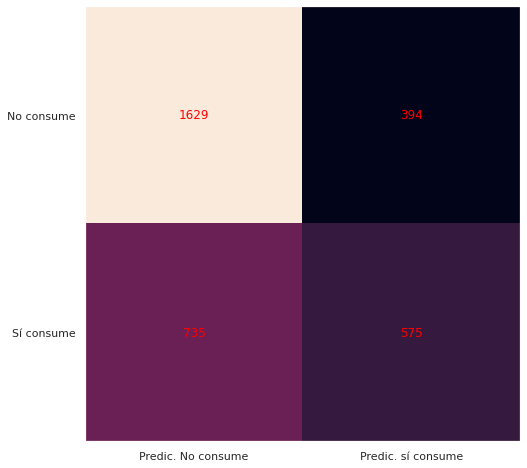

In [ ]:
# Modelo árbol de decisiones

from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(criterion='entropy',
                                    min_samples_split=5,
                                            min_samples_leaf=1,
                                            max_depth =5,random_state=1).fit(X_train,y_train)
                                            #class_weight="balanced"
                                            #(random_state=1)

y_pred = tree_class.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No consume', 'Predic. sí consume'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No consume', 'Sí consume'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

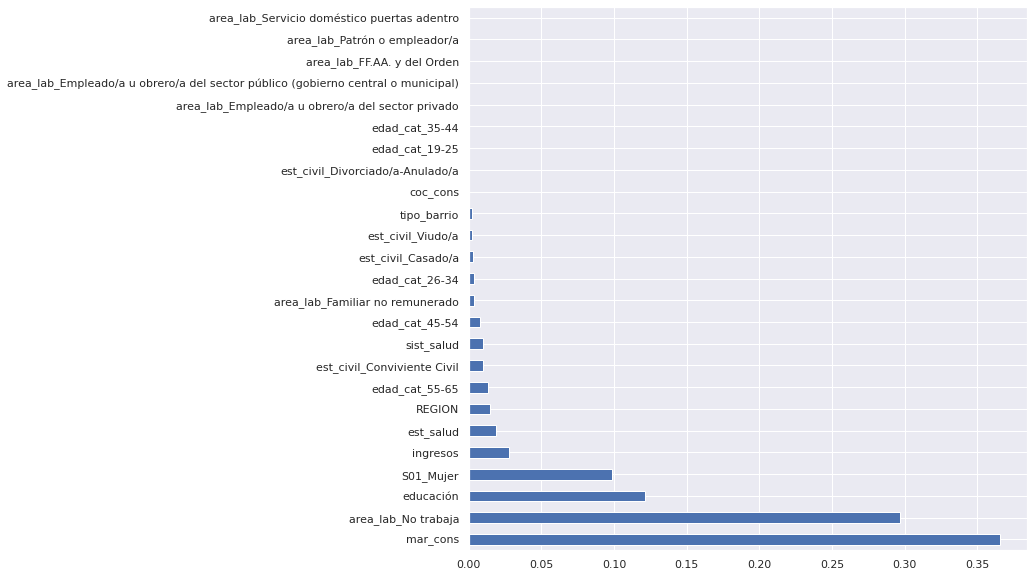

In [ ]:
# Importancia de las variables en el modelo
plt.figure(figsize=(10,10))
importance = pd.Series(tree_class.feature_importances_,index=X.columns)
importance.nlargest(25).plot(kind='barh')

+ **Probando métodos de balanceo**

              precision    recall  f1-score   support

           0       0.74      0.60      0.66      2023
           1       0.52      0.68      0.59      1310

    accuracy                           0.63      3333
   macro avg       0.63      0.64      0.63      3333
weighted avg       0.66      0.63      0.63      3333

[[1213  810]
 [ 424  886]]
recall en el set de Test: 0.68


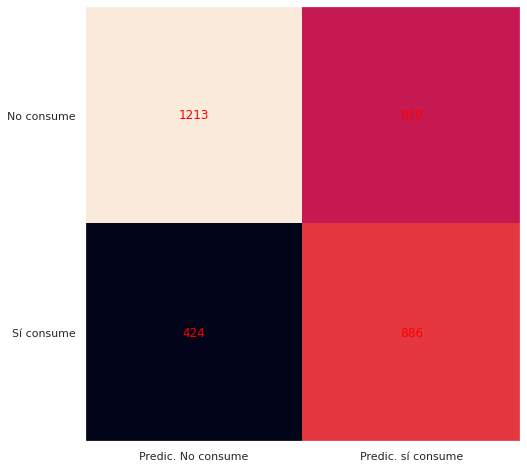

In [ ]:
# Modelo árbol de decisiones con penalización para compensar desbalance

from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(criterion='entropy',
                                    min_samples_split=3,
                                            min_samples_leaf=1,
                                            max_depth =5,random_state=1, class_weight="balanced").fit(X_train,y_train)
                                            #class_weight="balanced"
                                            #(random_state=1)

y_pred = tree_class.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No consume', 'Predic. sí consume'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No consume', 'Sí consume'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

+ **Método de balanceo SMOTE**

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_smote).items()))

[(0, 8120), (1, 8120)]


In [ ]:
# Determinando mejores parámetros para el árbol de decisión con Grid Search

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
param_grid = {'max_depth': [1, 2, 3, 4, 5,6],
              'min_samples_split': [2, 3, 4, 5,6,7]}
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train_smote, y_train_smote)

print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor precisión en validación cruzada: {:.2f}".format(grid_search.best_score_))

Mejores parámetros:  {'max_depth': 6, 'min_samples_split': 3}
Mejor precisión en validación cruzada: 0.67


              precision    recall  f1-score   support

           0       0.71      0.69      0.70      2023
           1       0.54      0.57      0.56      1310

    accuracy                           0.64      3333
   macro avg       0.63      0.63      0.63      3333
weighted avg       0.65      0.64      0.64      3333

[[1388  635]
 [ 559  751]]
recall en el set de Test: 0.57


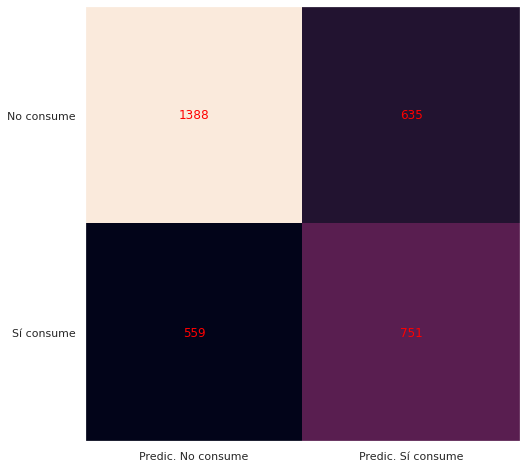

In [ ]:
#Árbol de decisiones con balanceo Smote

from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(criterion='entropy',
                                    min_samples_split=3,
                                            min_samples_leaf=1,
                                            max_depth =6,random_state=1).fit(X_train_smote,y_train_smote)
y_pred = tree_class.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No consume', 'Predic. Sí consume'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No consume', 'Sí consume'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

+ **Método de balanceo UnderSampler**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_rus).items()))

[(0, 5209), (1, 5209)]


In [ ]:
# Determinando mejores parámetros para el árbol de decisión con Grid Search

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
param_grid = {'max_depth': [1, 2, 3, 4, 5,6],
              'min_samples_split': [2, 3, 4, 5,6,7]}
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train_rus, y_train_rus)

print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor precisión en validación cruzada: {:.2f}".format(grid_search.best_score_))

Mejores parámetros:  {'max_depth': 4, 'min_samples_split': 2}
Mejor precisión en validación cruzada: 0.65


              precision    recall  f1-score   support

           0       0.74      0.59      0.66      2023
           1       0.52      0.69      0.59      1310

    accuracy                           0.63      3333
   macro avg       0.63      0.64      0.63      3333
weighted avg       0.66      0.63      0.63      3333

[[1202  821]
 [ 412  898]]
recall en el set de Test: 0.69


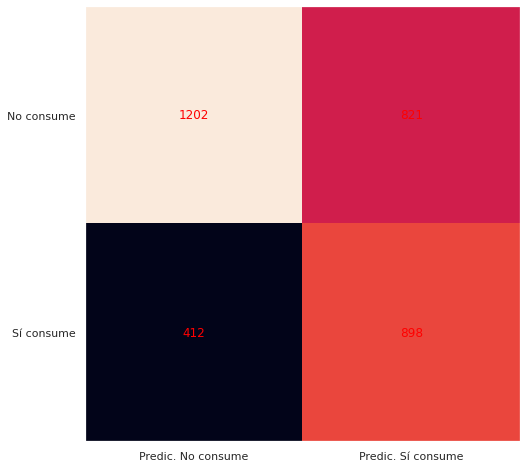

In [ ]:
#Árbol de decisiones con balanceo Under sampling

from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(criterion='entropy',
                                    min_samples_split=2,
                                            min_samples_leaf=1,
                                            max_depth =4,random_state=1).fit(X_train_rus,y_train_rus)
y_pred = tree_class.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No consume', 'Predic. Sí consume'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No consume', 'Sí consume'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

+ Cross validation Decision Tree con balanceo Under sampling

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

cross_val_score(tree_class, X_train_rus, y_train_rus, cv=10, scoring='recall')

array([0.70633397, 0.64683301, 0.66986564, 0.68522073, 0.69865643,
       0.67946257, 0.71017274, 0.70825336, 0.69230769, 0.66986564])

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(tree_class, X_train_rus, y_train_rus, cv=3)
recall_score(y_train_rus, y_train_pred)

0.6761374544058361

+ **Método de balanceo Over Sampler**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=2)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_ros).items()))

[(0, 8120), (1, 8120)]


In [ ]:
# Determinando mejores parámetros para el árbol de decisión con Grid Search

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
param_grid = {'max_depth': [1, 2, 3, 4, 5,6],
              'min_samples_split': [2, 3, 4, 5,6,7]}
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train_ros, y_train_ros)

print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor precisión en validación cruzada: {:.2f}".format(grid_search.best_score_))

Mejores parámetros:  {'max_depth': 6, 'min_samples_split': 4}
Mejor precisión en validación cruzada: 0.65


              precision    recall  f1-score   support

           0       0.73      0.61      0.66      2023
           1       0.52      0.66      0.58      1310

    accuracy                           0.63      3333
   macro avg       0.63      0.63      0.62      3333
weighted avg       0.65      0.63      0.63      3333

[[1225  798]
 [ 442  868]]
recall en el set de Test: 0.66


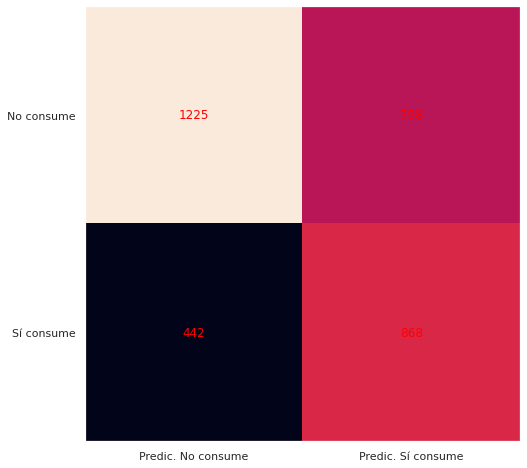

In [ ]:
#Árbol de decisiones con balanceo Over Sampling

from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(random_state=1,
                                            min_samples_split=6,
                                            min_samples_leaf=2,
                                            max_depth =6).fit(X_train_ros,y_train_ros)
y_pred = tree_class.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No consume', 'Predic. Sí consume'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No consume', 'Sí consume'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## **Gaussian Naives Bayes 'Consumidores de alcohol** ##

              precision    recall  f1-score   support

           0       0.71      0.64      0.68      2023
           1       0.52      0.60      0.56      1310

    accuracy                           0.63      3333
   macro avg       0.62      0.62      0.62      3333
weighted avg       0.64      0.63      0.63      3333

[[1304  719]
 [ 525  785]]
Recall en el set de Test: 0.60


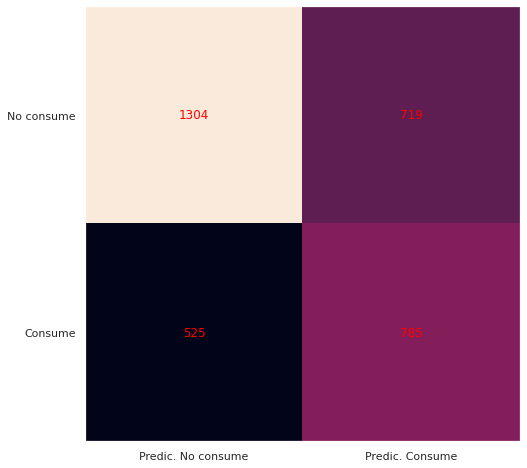

In [ ]:
#Naives Bayes con balanceo Over Sampler

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_ros,y_train_ros)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No consume', 'Predic. Consume'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No consume', 'Consume'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

+ Cross validation Naives bayes con over sampling

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

cross_val_score(gnb, X_train_ros, y_train_ros, cv=10, scoring='recall')

array([0.57019704, 0.59482759, 0.61453202, 0.58866995, 0.68965517,
       0.61206897, 0.61330049, 0.61206897, 0.591133  , 0.60591133])

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(gnb, X_train_ros, y_train_ros, cv=10)
recall_score(y_train_ros, y_train_pred)

0.6092364532019704

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      2023
           1       0.54      0.50      0.52      1310

    accuracy                           0.64      3333
   macro avg       0.62      0.61      0.62      3333
weighted avg       0.63      0.64      0.64      3333

[[1476  547]
 [ 657  653]]
Recall en el set de Test: 0.50


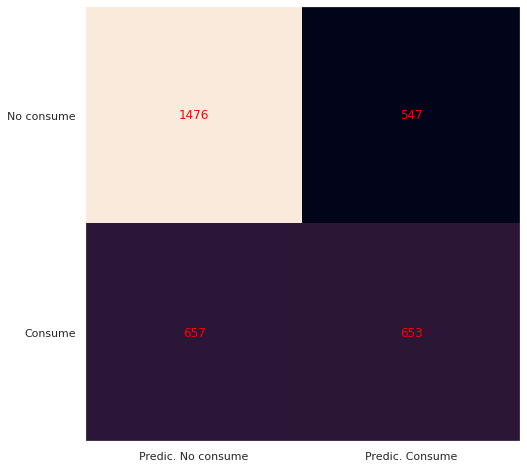

In [ ]:
#Naives Bayes con balanceo Under Sampler

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_rus,y_train_rus)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No consume', 'Predic. Consume'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No consume', 'Consume'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

              precision    recall  f1-score   support

           0       0.75      0.46      0.57      2023
           1       0.48      0.76      0.59      1310

    accuracy                           0.58      3333
   macro avg       0.61      0.61      0.58      3333
weighted avg       0.64      0.58      0.58      3333

[[ 937 1086]
 [ 315  995]]
Recall en el set de Test: 0.76


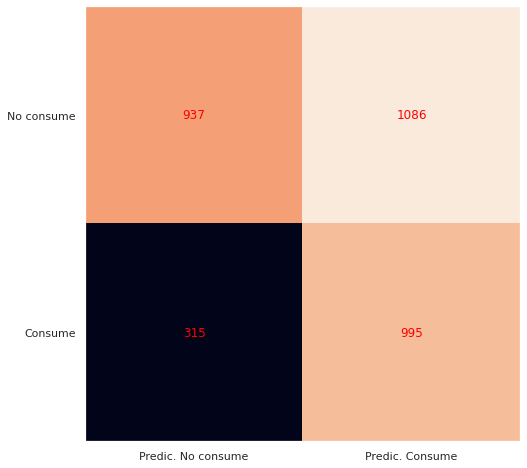

In [ ]:
#Naives Bayes con balanceo Smote

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_smote,y_train_smote)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No consume', 'Predic. Consume'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No consume', 'Consume'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

+ Cross validation Naives Bayes con smote

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
cross_val_score(gnb, X_train_smote, y_train_smote, cv=3, scoring='recall')

array([0.74325822, 0.82520325, 0.46952346])

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(gnb, X_train_smote, y_train_smote, cv=3)
recall_score(y_train_ros, y_train_pred)

0.6793103448275862

## **Árbol de decisiones 'Consumidores de marihuana'** ##

+ **Reordeno las varibles**

In [ ]:
# Corto la data para comenzar pruebas con modelos de clasificación

y = dfm['mar_cons']
X = dfm.drop(['SbjNum','mar_cons'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2 )

In [ ]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((13329, 27), (13329,), (3333, 27), (3333,))

In [ ]:
X_train.head(3)

,REGION,est_salud,ingresos,educación,sist_salud,tipo_barrio,alh_cons,coc_cons,S01_Mujer,est_civil_Casado/a,...,edad_cat_55-65,area_lab_Empleado/a u obrero/a del sector privado,area_lab_Empleado/a u obrero/a del sector público (gobierno central o municipal),area_lab_FF.AA. y del Orden,area_lab_Familiar no remunerado,area_lab_No trabaja,area_lab_Patrón o empleador/a,area_lab_Servicio doméstico puertas adentro,area_lab_Servicio doméstico puertas afuera,area_lab_Trabajador/a por cuenta propia
7045,13.0,3.0,2.0,4.0,1.0,3.0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
12577,10.0,4.0,4.0,9.0,7.0,1.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
13849,12.0,3.0,4.0,4.0,3.0,3.0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
# conteo de valores 0= no sonsume ; 1= sí consume
y.value_counts()

0    15256
1     1406
Name: mar_cons, dtype: int64

Muestra mayor desbalance de datos que en el caso de consumo de alcohol

In [ ]:
# Determinando mejores parámetros para el árbol de decisión con Grid Search

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
param_grid = {'max_depth': [1, 2, 3, 4, 5,6],
              'min_samples_split': [2, 3, 4, 5,6,7]}
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor precisión en validación cruzada: {:.2f}".format(grid_search.best_score_))

Mejores parámetros:  {'max_depth': 5, 'min_samples_split': 2}
Mejor precisión en validación cruzada: 0.92


              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3034
           1       0.00      0.00      0.00       299

    accuracy                           0.91      3333
   macro avg       0.46      0.50      0.48      3333
weighted avg       0.83      0.91      0.87      3333

[[3033    1]
 [ 299    0]]
recall en el set de Test: 0.00


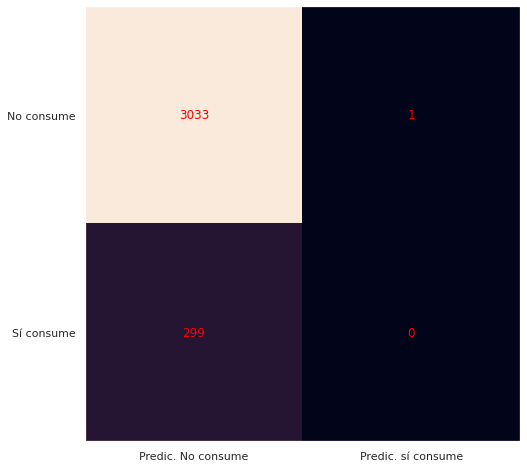

In [ ]:
# Modelo árbol de decisiones

from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(criterion='entropy',
                                    min_samples_split=4,
                                            min_samples_leaf=1,
                                            max_depth =5,random_state=1).fit(X_train,y_train)
                                            #class_weight="balanced"
                                            #(random_state=1)

y_pred = tree_class.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No consume', 'Predic. sí consume'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No consume', 'Sí consume'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

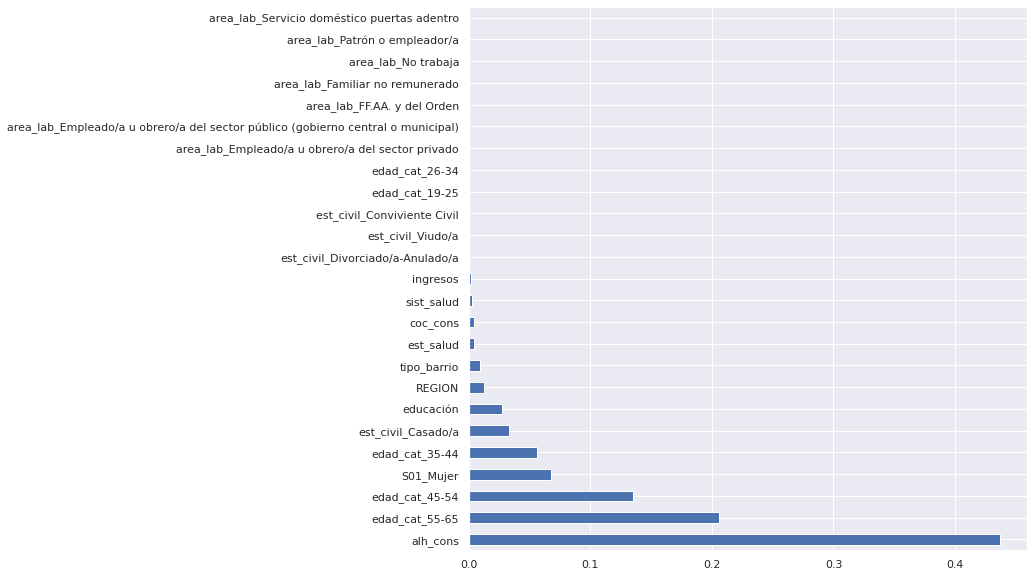

In [ ]:
# Importancia de las variables en el modelo
plt.figure(figsize=(10,10))
importance = pd.Series(tree_class.feature_importances_,index=X.columns)
importance.nlargest(25).plot(kind='barh')

+ **Probando métodos de balanceo**

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      3034
           1       0.24      0.68      0.35       299

    accuracy                           0.78      3333
   macro avg       0.60      0.73      0.61      3333
weighted avg       0.90      0.78      0.82      3333

[[2395  639]
 [  97  202]]
recall en el set de Test: 0.68


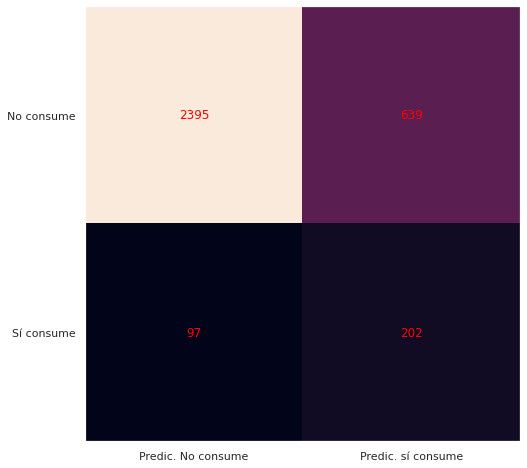

In [ ]:
# Modelo árbol de decisiones con penalización para compensar desbalance

from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(criterion='entropy',
                                    min_samples_split=2,
                                            min_samples_leaf=1,
                                            max_depth =5,random_state=1, class_weight="balanced").fit(X_train,y_train)
                                            #class_weight="balanced"
                                            #(random_state=1)

y_pred = tree_class.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No consume', 'Predic. sí consume'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No consume', 'Sí consume'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

+ Cross validation Árbol de decisiones con balanceo por penalización

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
cross_val_score(tree_class, X_train, y_train, cv=3, scoring='recall')

array([0.71544715, 0.65311653, 0.75067751])

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(tree_class, X_train, y_train, cv=3)
recall_score(y_train, y_train_pred)

0.7064137308039747

+ **Método de balanceo SMOTE**

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_smote).items()))

[(0, 12222), (1, 12222)]


In [ ]:
# Determinando mejores parámetros para el árbol de decisión con Grid Search

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
param_grid = {'max_depth': [1, 2, 3, 4, 5,6],
              'min_samples_split': [2, 3, 4, 5,6,7]}
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train_smote, y_train_smote)

print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor precisión en validación cruzada: {:.2f}".format(grid_search.best_score_))

Mejores parámetros:  {'max_depth': 6, 'min_samples_split': 4}
Mejor precisión en validación cruzada: 0.85


              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3034
           1       0.25      0.56      0.35       299

    accuracy                           0.81      3333
   macro avg       0.60      0.70      0.62      3333
weighted avg       0.89      0.81      0.84      3333

[[2544  490]
 [ 133  166]]
recall en el set de Test: 0.56


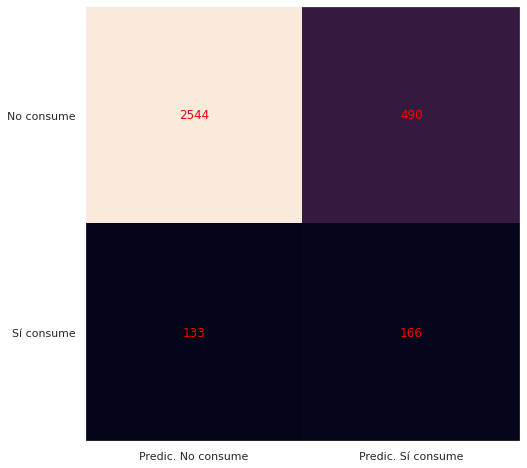

In [ ]:
#Árbol de decisiones con balanceo Smote

from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(criterion='entropy',
                                    min_samples_split=4,
                                            min_samples_leaf=2,
                                            max_depth =6,random_state=1).fit(X_train_smote,y_train_smote)
y_pred = tree_class.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No consume', 'Predic. Sí consume'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No consume', 'Sí consume'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

+ **Método de balanceo Under Sampler**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_rus).items()))

[(0, 1107), (1, 1107)]


In [ ]:
# Determinando mejores parámetros para el árbol de decisión con Grid Search

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
param_grid = {'max_depth': [1, 2, 3, 4, 5,6],
              'min_samples_split': [2, 3, 4, 5,6,7]}
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train_rus, y_train_rus)

print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor precisión en validación cruzada: {:.2f}".format(grid_search.best_score_))

Mejores parámetros:  {'max_depth': 3, 'min_samples_split': 2}
Mejor precisión en validación cruzada: 0.73


              precision    recall  f1-score   support

           0       0.96      0.82      0.88      3034
           1       0.26      0.66      0.37       299

    accuracy                           0.80      3333
   macro avg       0.61      0.74      0.63      3333
weighted avg       0.90      0.80      0.84      3333

[[2473  561]
 [ 101  198]]
recall en el set de Test: 0.66


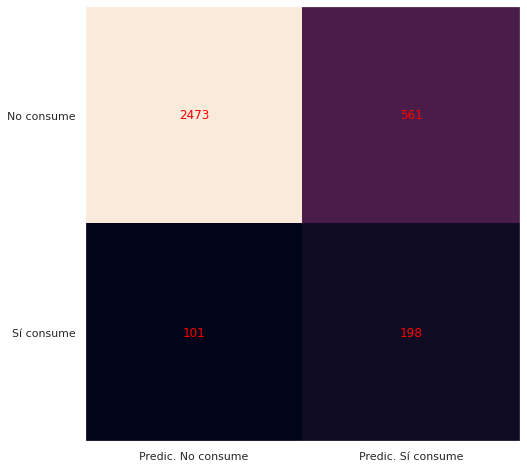

In [ ]:
#Árbol de decisiones con balanceo Under sampling

from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(criterion='entropy',
                                    min_samples_split=2,
                                            min_samples_leaf=1,
                                            max_depth =3,random_state=1).fit(X_train_rus,y_train_rus)
y_pred = tree_class.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No consume', 'Predic. Sí consume'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No consume', 'Sí consume'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

+ **Método de balanceo Over Sampler**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=2)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_ros).items()))


[(0, 12222), (1, 12222)]


In [ ]:
# Determinando mejores parámetros para el árbol de decisión con Grid Search

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
param_grid = {'max_depth': [1, 2, 3, 4, 5,6],
              'min_samples_split': [2, 3, 4, 5,6,7]}
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train_ros, y_train_ros)

print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor precisión en validación cruzada: {:.2f}".format(grid_search.best_score_))

Mejores parámetros:  {'max_depth': 6, 'min_samples_split': 7}
Mejor precisión en validación cruzada: 0.76


              precision    recall  f1-score   support

           0       0.96      0.79      0.87      3034
           1       0.24      0.67      0.35       299

    accuracy                           0.78      3333
   macro avg       0.60      0.73      0.61      3333
weighted avg       0.90      0.78      0.82      3333

[[2400  634]
 [  99  200]]
recall en el set de Test: 0.67


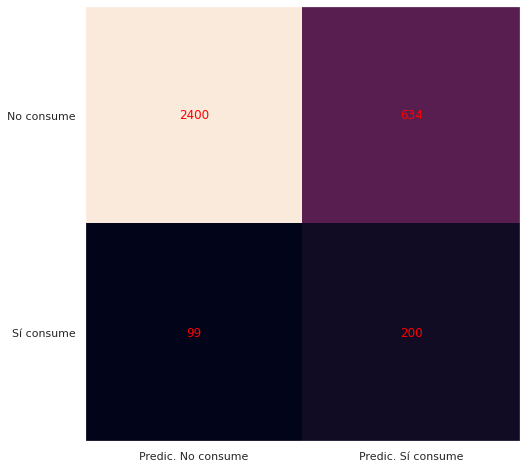

In [ ]:
#Árbol de decisiones con balanceo Over Sampling

from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(criterion='entropy',
                                    random_state=1,
                                            min_samples_split=3,
                                            min_samples_leaf=2,
                                            max_depth =6).fit(X_train_ros,y_train_ros)
y_pred = tree_class.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No consume', 'Predic. Sí consume'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No consume', 'Sí consume'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

+ Cross validation Árbol de decisiones con balanceo Over Sampling

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
cross_val_score(tree_class, X_train_ros, y_train_ros, cv=10, scoring='recall')

array([0.72176759, 0.72667758, 0.78740801, 0.73017171, 0.73158756,
       0.70294599, 0.72504092, 0.79459902, 0.7193126 , 0.71358429])

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(tree_class, X_train_ros, y_train_ros, cv=3)
recall_score(y_train_ros, y_train_pred)

0.7364588447062674

## **Gaussian Naives Bayes 'Consumidores de marihuana** ##

              precision    recall  f1-score   support

           0       0.99      0.31      0.47      3034
           1       0.12      0.96      0.21       299

    accuracy                           0.36      3333
   macro avg       0.55      0.63      0.34      3333
weighted avg       0.91      0.36      0.44      3333

[[ 930 2104]
 [  13  286]]
Recall en el set de Test: 0.96


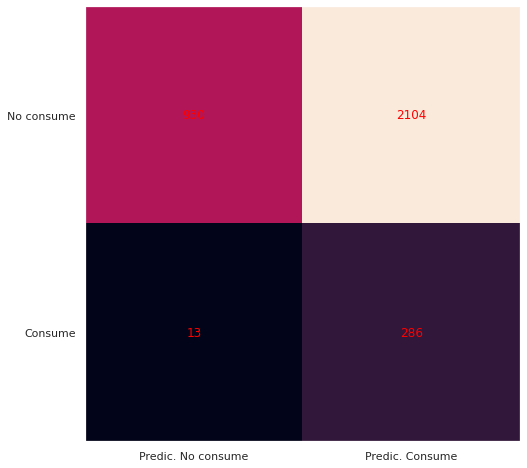

In [ ]:
#Naives Bayes con balanceo Over Sampler

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_ros,y_train_ros)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No consume', 'Predic. Consume'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No consume', 'Consume'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Cross validation Naives bayes con over sampling

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

cross_val_score(gnb, X_train_ros, y_train_ros, cv=10, scoring='recall')

array([0.93698854, 0.94680851, 0.9362224 , 0.94112837, 0.9386252 ,
       0.9410802 , 0.94844517, 0.94189853, 0.9386252 , 0.94844517])

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(gnb, X_train_ros, y_train_ros, cv=3)
recall_score(y_train_ros, y_train_pred)

0.9414171166748486

              precision    recall  f1-score   support

           0       0.98      0.28      0.43      3034
           1       0.12      0.96      0.21       299

    accuracy                           0.34      3333
   macro avg       0.55      0.62      0.32      3333
weighted avg       0.91      0.34      0.41      3333

[[ 842 2192]
 [  13  286]]
Recall en el set de Test: 0.96


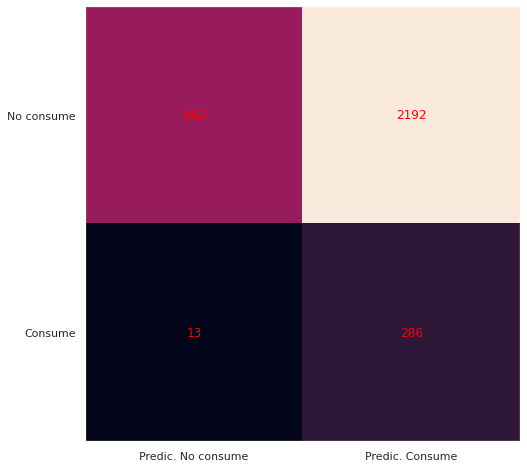

In [ ]:
#Naives Bayes con balanceo Under Sampler

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_rus,y_train_rus)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No consume', 'Predic. Consume'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No consume', 'Consume'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.61      0.75      3034
           1       0.16      0.75      0.26       299

    accuracy                           0.63      3333
   macro avg       0.56      0.68      0.51      3333
weighted avg       0.89      0.63      0.71      3333

[[1863 1171]
 [  75  224]]
Recall en el set de Test: 0.75


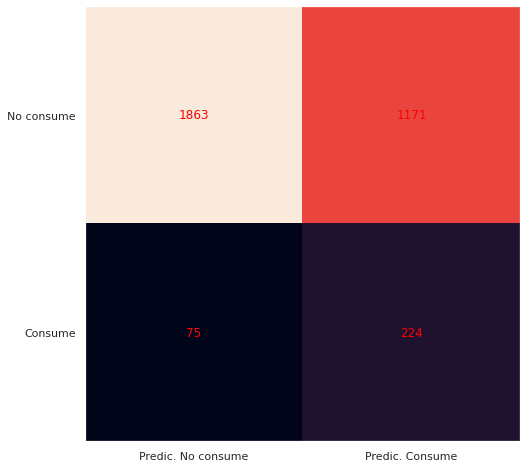

In [ ]:
#Naives Bayes con balanceo Smote

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_smote,y_train_smote)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No consume', 'Predic. Consume'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No consume', 'Consume'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Cross validation Naives Bayes con smote

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
cross_val_score(gnb, X_train_smote, y_train_smote, cv=5, scoring='recall')

array([0.74014778, 0.75738916, 0.8091133 , 0.79125616, 0.77770936])

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(gnb, X_train_smote, y_train_smote, cv=3)
recall_score(y_train_smote, y_train_pred)

0.6793103448275862